# Credit EDA

###  1. Importing libraries & files

In [255]:
#import the warnings.
import warnings

warnings.filterwarnings('ignore')

In [256]:
# Importing all the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

###  2. Checking the structure of Application Dataset

In [257]:
# Reading dataset from local storage (Application-data.csv)

df_app = pd.read_csv('application_data.csv')

pd.set_option('display.max_rows', 600)
pd.set_option('display.max_columns', 600)
pd.set_option('display.width', 1000)

df_app.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

### 2.1 Data Types

In [258]:
# Determining the shape of the datset
df_app.shape

(307511, 122)

In [259]:
# Checking the column-wise info of the dataframe
df_app.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [260]:
# Checking the summary for the numeric columns 
df_app.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,104582.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307509.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,134133.000000,3.068510e+05,246546.000000,151450.00000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,159080.000000,306490.000000,306490.000000,306490.000000,306490.000000,307510.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.00000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,-4986.120328,-2994.202373,12.061091,0.999997,0.819889,0.199368,0.998133,0.281066,0.056720,2.152665,2.052463,2.031521,12.063419,0.015144,0.050769,0.040659,0.078173,0.230454,0.179555,0.502130,5.143927e-01,0.510853,0.11744,0.088442,0.977735,0.752471,0.044621,0.078942,0.149725,0.226282,0.231894,0.066333,0.100775,0.107399,0.008809,0.028358,0.114231,0.087543,0.977065,0.759637,0.042553,0.074490,0.145193,0.222315,0.228058,0.064958,0.105645,0.105975,0.008076,0.027022,0.117850,0.087955,0.97

In [261]:
# Checking the null values

df_app.isnull().sum()

SK_ID_CURR                           0
TARGET                               0
NAME_CONTRACT_TYPE                   0
CODE_GENDER                          0
FLAG_OWN_CAR                         0
FLAG_OWN_REALTY                      0
CNT_CHILDREN                         0
AMT_INCOME_TOTAL                     0
AMT_CREDIT                           0
AMT_ANNUITY                         12
AMT_GOODS_PRICE                    278
NAME_TYPE_SUITE                   1292
NAME_INCOME_TYPE                     0
NAME_EDUCATION_TYPE                  0
NAME_FAMILY_STATUS                   0
NAME_HOUSING_TYPE                    0
REGION_POPULATION_RELATIVE           0
DAYS_BIRTH                           0
DAYS_EMPLOYED                        0
DAYS_REGISTRATION                    0
DAYS_ID_PUBLISH                      0
OWN_CAR_AGE                     202929
FLAG_MOBIL                           0
FLAG_EMP_PHONE                       0
FLAG_WORK_PHONE                      0
FLAG_CONT_MOBILE         

In [262]:
# listing the null values columns having more than 13% null values

null_col = df_app.isnull().sum()

null_col = (100 * null_col/len(df_app)).round(2)

len(null_col[null_col > 13])

57

#### Application data Dataset :
- We have 57 columns having null value greater than 13% of total values, if not removed will create unreliable outcome. 
So removing those 57 columns.

In [263]:
# Removing columns whose null values greater than 13 % of total values.

df_app = df_app.loc[:, df_app.isnull().mean() <= 0.13]

df_app.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,1,1,0,1,1,0,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.262949,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,1,1,0,1,1,0,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,1,1,1,1,1,0,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,0.555912,0.0,0.0,0.0,0.0,-815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039,-9833.0,-2437,1,1,0,1,0,0,2.0,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,0.650442,2.0,0.0,2.0,0.0,-617.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,-19932,-3038,-4311.0,-3458,1,1,0,1,0,0,1.0,2,2,THURSDAY,11,0,0,0,0,1,1,Religion,0.322738,0.0,0.0,0.0,0.0,-1106.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0


In [264]:
# Checking shape again

df_app.shape

(307511, 65)

In [265]:
# Checking the null values

df_app.isnull().sum()

SK_ID_CURR                        0
TARGET                            0
NAME_CONTRACT_TYPE                0
CODE_GENDER                       0
FLAG_OWN_CAR                      0
FLAG_OWN_REALTY                   0
CNT_CHILDREN                      0
AMT_INCOME_TOTAL                  0
AMT_CREDIT                        0
AMT_ANNUITY                      12
AMT_GOODS_PRICE                 278
NAME_TYPE_SUITE                1292
NAME_INCOME_TYPE                  0
NAME_EDUCATION_TYPE               0
NAME_FAMILY_STATUS                0
NAME_HOUSING_TYPE                 0
REGION_POPULATION_RELATIVE        0
DAYS_BIRTH                        0
DAYS_EMPLOYED                     0
DAYS_REGISTRATION                 0
DAYS_ID_PUBLISH                   0
FLAG_MOBIL                        0
FLAG_EMP_PHONE                    0
FLAG_WORK_PHONE                   0
FLAG_CONT_MOBILE                  0
FLAG_PHONE                        0
FLAG_EMAIL                        0
CNT_FAM_MEMBERS             

In [266]:
# Checking the null values percentages

(100*df_app.isnull().sum()/ len(df_app)).round(2)

SK_ID_CURR                     0.00
TARGET                         0.00
NAME_CONTRACT_TYPE             0.00
CODE_GENDER                    0.00
FLAG_OWN_CAR                   0.00
FLAG_OWN_REALTY                0.00
CNT_CHILDREN                   0.00
AMT_INCOME_TOTAL               0.00
AMT_CREDIT                     0.00
AMT_ANNUITY                    0.00
AMT_GOODS_PRICE                0.09
NAME_TYPE_SUITE                0.42
NAME_INCOME_TYPE               0.00
NAME_EDUCATION_TYPE            0.00
NAME_FAMILY_STATUS             0.00
NAME_HOUSING_TYPE              0.00
REGION_POPULATION_RELATIVE     0.00
DAYS_BIRTH                     0.00
DAYS_EMPLOYED                  0.00
DAYS_REGISTRATION              0.00
DAYS_ID_PUBLISH                0.00
FLAG_MOBIL                     0.00
FLAG_EMP_PHONE                 0.00
FLAG_WORK_PHONE                0.00
FLAG_CONT_MOBILE               0.00
FLAG_PHONE                     0.00
FLAG_EMAIL                     0.00
CNT_FAM_MEMBERS             

#### Imputation of values in columns where missing values are less than 13%.

#### 2.2.1 Missing values of column 'AMT_ANNUITY'

In [267]:
# Checking null values from column 'AMT_ANNUITY'
df_app.AMT_ANNUITY.isnull().sum()

12

In [268]:
# Checking the summary for the AMT_ANNUITY column.

df_app.AMT_ANNUITY.describe()

count    307499.000000
mean      27108.573909
std       14493.737315
min        1615.500000
25%       16524.000000
50%       24903.000000
75%       34596.000000
max      258025.500000
Name: AMT_ANNUITY, dtype: float64

- This column is have outliers which is very large it will be inappropriate to fill those missing values with mean, we will fill those missing banks with median value.

In [269]:
# Median value for AMT_ANNUITY column.

median_AMT = df_app.AMT_ANNUITY.median()
median_AMT

24903.0

In [270]:
# Filling missing values with median value.

df_app.AMT_ANNUITY.fillna(median_AMT, inplace = True)

In [271]:
# Checking null values from column 'AMT_ANNUITY'

df_app.AMT_ANNUITY.isnull().sum()

0

#### 2.2.2 Missing values of column 'AMT_GOODS_PRICE'

In [272]:
# Checking null values from column 'AMT_GOODS_PRICE'

df_app.AMT_GOODS_PRICE.isnull().sum()

278

In [273]:
# Checking the summary for the AMT_GOODS_PRICE column.

df_app.AMT_GOODS_PRICE.describe()

count    3.072330e+05
mean     5.383962e+05
std      3.694465e+05
min      4.050000e+04
25%      2.385000e+05
50%      4.500000e+05
75%      6.795000e+05
max      4.050000e+06
Name: AMT_GOODS_PRICE, dtype: float64

In [274]:
# Missing values in column 'AMT_GOODS_PRICE' can be imputed by mean value as it is continuous float variable

mean_AGP = df_app.AMT_GOODS_PRICE.mean()
mean_AGP

538396.2074288895

In [275]:
# Filling missing values with mean value.

df_app['AMT_GOODS_PRICE'].fillna(mean_AGP, inplace = True)

In [276]:
# Checking the null values again

df_app.AMT_GOODS_PRICE.isnull().sum()

0

#### 2.2.3 Missing values of column 'NAME_TYPE_SUITE'

In [277]:
# Checking null values from NAME_TYPE_SUITE column

df_app.NAME_TYPE_SUITE.isnull().sum()

1292

In [278]:
# Checking normalize value counts for NAME_TYPE_SUITE column

df_app.NAME_TYPE_SUITE.value_counts(normalize = True)

Unaccompanied      0.811596
Family             0.131112
Spouse, partner    0.037130
Children           0.010669
Other_B            0.005780
Other_A            0.002828
Group of people    0.000885
Name: NAME_TYPE_SUITE, dtype: float64

In [279]:
# Missing values in Categorical column 'NAME_TYPE_SUITE' should be replaced with the mode value.

mode_NTS= df_app.NAME_TYPE_SUITE.mode()[0]
mode_NTS

'Unaccompanied'

In [280]:
# Filling missing values with mode value.

df_app['NAME_TYPE_SUITE'].fillna(mode_NTS, inplace = True)

df_app.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,1,1,0,1,1,0,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.262949,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,1,1,0,1,1,0,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,1,1,1,1,1,0,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,0.555912,0.0,0.0,0.0,0.0,-815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039,-9833.0,-2437,1,1,0,1,0,0,2.0,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,0.650442,2.0,0.0,2.0,0.0,-617.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,-19932,-3038,-4311.0,-3458,1,1,0,1,0,0,1.0,2,2,THURSDAY,11,0,0,0,0,1,1,Religion,0.322738,0.0,0.0,0.0,0.0,-1106.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0


In [281]:
# Chaking missing values in column 'NAME_TYPE_SUITE' again

df_app.NAME_TYPE_SUITE.isnull().sum()

0

#### 2.2.4 Missing values of column 'EXT_SOURCE_2'

In [282]:
# Chaking missing values in column EXT_SOURCE_2

df_app.EXT_SOURCE_2.isnull().sum()

660

In [283]:
# Checking the summary for the EXT_SOURCE_2 Column

df_app.EXT_SOURCE_2.describe()

count    3.068510e+05
mean     5.143927e-01
std      1.910602e-01
min      8.173617e-08
25%      3.924574e-01
50%      5.659614e-01
75%      6.636171e-01
max      8.549997e-01
Name: EXT_SOURCE_2, dtype: float64

In [284]:
# Missing values in column 'EXT_SOURCE_2' can be imputed by mean value as it is continuous float variable

mean_EX2 = df_app.EXT_SOURCE_2.mean()
mean_EX2

0.5143926741308463

In [285]:
# Filling missing values with mean value.

df_app.EXT_SOURCE_2.fillna(mean_EX2, inplace= True)

In [286]:
# Chaking missing values in column 'EXT_SOURCE_2' again

df_app.EXT_SOURCE_2.isnull().sum()

0

#### 2.2.5 Missing values of column
- 'OBS_30_CNT_SOCIAL_CIRCLE', 
- 'DEF_30_CNT_SOCIAL_CIRCLE', 
- 'OBS_60_CNT_SOCIAL_CIRCLE',
- 'DEF_60_CNT_SOCIAL_CIRCLE'

In [287]:
# Creating dataframe 'CNT_SOCIAL_CIRCLE' for missing value analysis for above columns.

CNT_SOCIAL_CIRCLE = df_app[['OBS_30_CNT_SOCIAL_CIRCLE','DEF_30_CNT_SOCIAL_CIRCLE',
                            'OBS_60_CNT_SOCIAL_CIRCLE','DEF_60_CNT_SOCIAL_CIRCLE']]
CNT_SOCIAL_CIRCLE

,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE
0,2.0,2.0,2.0,2.0
1,1.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0
3,2.0,0.0,2.0,0.0
4,0.0,0.0,0.0,0.0
...,...,...,...,...
307506,0.0,0.0,0.0,0.0
307507,0.0,0.0,0.0,0.0
307508,6.0,0.0,6.0,0.0
307509,0.0,0.0,0.0,0.0


In [288]:
# Checking the summary for CNT_SOCIAL_CIRCLE

CNT_SOCIAL_CIRCLE.describe()

,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE
count,306490.000000,306490.000000,306490.000000,306490.000000
mean,1.422245,0.143421,1.405292,0.100049
std,2.400989,0.446698,2.379803,0.362291
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000
75%,2.000000,0.000000,2.000000,0.000000
max,348.000000,34.000000,344.000000,24.000000


In [289]:
# We have values in 'CNT_SOCIAL_CIRCLE' on median as '0' so imputing missing values by median in Application dataset

med_OBS_30 = df_app.OBS_30_CNT_SOCIAL_CIRCLE.median()

med_DEF_30 = df_app.DEF_30_CNT_SOCIAL_CIRCLE.median()

med_OBS_60 = df_app.OBS_60_CNT_SOCIAL_CIRCLE.median()

med_DEF_60 = df_app.DEF_60_CNT_SOCIAL_CIRCLE.median()

In [290]:
# Filling missing values with Median value.

df_app.OBS_30_CNT_SOCIAL_CIRCLE.fillna(med_OBS_30, inplace= True)

df_app.DEF_30_CNT_SOCIAL_CIRCLE.fillna(med_DEF_30, inplace= True)

df_app.OBS_60_CNT_SOCIAL_CIRCLE.fillna(med_OBS_60, inplace= True)

df_app.DEF_60_CNT_SOCIAL_CIRCLE.fillna(med_DEF_60, inplace= True)

In [291]:
df_app.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,1,1,0,1,1,0,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.262949,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,1,1,0,1,1,0,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,1,1,1,1,1,0,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,0.555912,0.0,0.0,0.0,0.0,-815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039,-9833.0,-2437,1,1,0,1,0,0,2.0,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,0.650442,2.0,0.0,2.0,0.0,-617.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,-19932,-3038,-4311.0,-3458,1,1,0,1,0,0,1.0,2,2,THURSDAY,11,0,0,0,0,1,1,Religion,0.322738,0.0,0.0,0.0,0.0,-1106.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0


In [292]:
# Chaking missing values in Application Data again

df_app.isnull().sum()

SK_ID_CURR                     0
TARGET                         0
NAME_CONTRACT_TYPE             0
CODE_GENDER                    0
FLAG_OWN_CAR                   0
FLAG_OWN_REALTY                0
CNT_CHILDREN                   0
AMT_INCOME_TOTAL               0
AMT_CREDIT                     0
AMT_ANNUITY                    0
AMT_GOODS_PRICE                0
NAME_TYPE_SUITE                0
NAME_INCOME_TYPE               0
NAME_EDUCATION_TYPE            0
NAME_FAMILY_STATUS             0
NAME_HOUSING_TYPE              0
REGION_POPULATION_RELATIVE     0
DAYS_BIRTH                     0
DAYS_EMPLOYED                  0
DAYS_REGISTRATION              0
DAYS_ID_PUBLISH                0
FLAG_MOBIL                     0
FLAG_EMP_PHONE                 0
FLAG_WORK_PHONE                0
FLAG_CONT_MOBILE               0
FLAG_PHONE                     0
FLAG_EMAIL                     0
CNT_FAM_MEMBERS                2
REGION_RATING_CLIENT           0
REGION_RATING_CLIENT_W_CITY    0
WEEKDAY_AP

#### 2.2.7 Missing values from columns
- CNT_FAM_MEMBERS
- DAYS_LAST_PHONE_CHANGE

In [293]:
# We have missing value 2 for column 'CNT_FAM_MEMBERS' & '1' for column 'DAYS_LAST_PHONE_CHANGE'. So dropping missing rows.

df_app = df_app[~df_app.CNT_FAM_MEMBERS.isnull()].copy()
df_app.shape

(307509, 65)

In [294]:
df_app = df_app[~df_app.DAYS_LAST_PHONE_CHANGE.isnull()].copy()
df_app.shape

(307508, 65)

In [295]:
# Checking for missing values in Application Data (df_app).

df_app.isnull().sum()

SK_ID_CURR                     0
TARGET                         0
NAME_CONTRACT_TYPE             0
CODE_GENDER                    0
FLAG_OWN_CAR                   0
FLAG_OWN_REALTY                0
CNT_CHILDREN                   0
AMT_INCOME_TOTAL               0
AMT_CREDIT                     0
AMT_ANNUITY                    0
AMT_GOODS_PRICE                0
NAME_TYPE_SUITE                0
NAME_INCOME_TYPE               0
NAME_EDUCATION_TYPE            0
NAME_FAMILY_STATUS             0
NAME_HOUSING_TYPE              0
REGION_POPULATION_RELATIVE     0
DAYS_BIRTH                     0
DAYS_EMPLOYED                  0
DAYS_REGISTRATION              0
DAYS_ID_PUBLISH                0
FLAG_MOBIL                     0
FLAG_EMP_PHONE                 0
FLAG_WORK_PHONE                0
FLAG_CONT_MOBILE               0
FLAG_PHONE                     0
FLAG_EMAIL                     0
CNT_FAM_MEMBERS                0
REGION_RATING_CLIENT           0
REGION_RATING_CLIENT_W_CITY    0
WEEKDAY_AP

Now, all columns have zero null values.

### 2.3 Checking Data types of Columns

In [296]:
df_app.select_dtypes('object').columns.tolist()

['NAME_CONTRACT_TYPE',
 'CODE_GENDER',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'NAME_TYPE_SUITE',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'WEEKDAY_APPR_PROCESS_START',
 'ORGANIZATION_TYPE']

In [297]:
df_app.select_dtypes('int64').columns.tolist()

['SK_ID_CURR',
 'TARGET',
 'CNT_CHILDREN',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_ID_PUBLISH',
 'FLAG_MOBIL',
 'FLAG_EMP_PHONE',
 'FLAG_WORK_PHONE',
 'FLAG_CONT_MOBILE',
 'FLAG_PHONE',
 'FLAG_EMAIL',
 'REGION_RATING_CLIENT',
 'REGION_RATING_CLIENT_W_CITY',
 'HOUR_APPR_PROCESS_START',
 'REG_REGION_NOT_LIVE_REGION',
 'REG_REGION_NOT_WORK_REGION',
 'LIVE_REGION_NOT_WORK_REGION',
 'REG_CITY_NOT_LIVE_CITY',
 'REG_CITY_NOT_WORK_CITY',
 'LIVE_CITY_NOT_WORK_CITY',
 'FLAG_DOCUMENT_2',
 'FLAG_DOCUMENT_3',
 'FLAG_DOCUMENT_4',
 'FLAG_DOCUMENT_5',
 'FLAG_DOCUMENT_6',
 'FLAG_DOCUMENT_7',
 'FLAG_DOCUMENT_8',
 'FLAG_DOCUMENT_9',
 'FLAG_DOCUMENT_10',
 'FLAG_DOCUMENT_11',
 'FLAG_DOCUMENT_12',
 'FLAG_DOCUMENT_13',
 'FLAG_DOCUMENT_14',
 'FLAG_DOCUMENT_15',
 'FLAG_DOCUMENT_16',
 'FLAG_DOCUMENT_17',
 'FLAG_DOCUMENT_18',
 'FLAG_DOCUMENT_19',
 'FLAG_DOCUMENT_20',
 'FLAG_DOCUMENT_21']

In [298]:
df_app.select_dtypes('float64').columns.tolist()

['AMT_INCOME_TOTAL',
 'AMT_CREDIT',
 'AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'REGION_POPULATION_RELATIVE',
 'DAYS_REGISTRATION',
 'CNT_FAM_MEMBERS',
 'EXT_SOURCE_2',
 'OBS_30_CNT_SOCIAL_CIRCLE',
 'DEF_30_CNT_SOCIAL_CIRCLE',
 'OBS_60_CNT_SOCIAL_CIRCLE',
 'DEF_60_CNT_SOCIAL_CIRCLE',
 'DAYS_LAST_PHONE_CHANGE']

#### 2.3.1 From above columns, 
- number of days, 
- number of inquairies , 
- number of family members 
- number of people in social circle. Are float entries they should be whole numbers or integers.

In [299]:
# Converting dtype of above float columns to integers

df_app['DAYS_REGISTRATION'] = df_app['DAYS_REGISTRATION'].astype('int64')

df_app['CNT_FAM_MEMBERS'] = df_app['CNT_FAM_MEMBERS'].astype('int64')

df_app['OBS_30_CNT_SOCIAL_CIRCLE'] = df_app['OBS_30_CNT_SOCIAL_CIRCLE'].astype('int64')

df_app['DEF_30_CNT_SOCIAL_CIRCLE'] = df_app['DEF_30_CNT_SOCIAL_CIRCLE'].astype('int64')

df_app['OBS_60_CNT_SOCIAL_CIRCLE'] = df_app['OBS_60_CNT_SOCIAL_CIRCLE'].astype('int64')

df_app['DEF_60_CNT_SOCIAL_CIRCLE'] = df_app['DEF_60_CNT_SOCIAL_CIRCLE'].astype('int64')

df_app['DAYS_LAST_PHONE_CHANGE'] = df_app['DAYS_LAST_PHONE_CHANGE'].astype('int64')


In [300]:
# value counts for dtypes

df_app.dtypes.value_counts()

int64      48
object     11
float64     6
dtype: int64

### 2.4 Checking Outliers

In [301]:
# Checking the summary for Application Data

df_app.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_2,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21
count,307508.000000,307508.00000,307508.000000,3.075080e+05,3.075080e+05,307508.000000,3.075080e+05,307508.000000,307508.000000,307508.000000,307508.000000,307508.000000,307508.0,307508.000000,307508.000000,307508.000000,307508.000000,307508.000000,307508.000000,307508.000000,307508.000000,307508.000000,307508.000000,307508.000000,307508.000000,307508.000000,307508.000000,307508.000000,3.075080e+05,307508.000000,307508.000000,307508.000000,307508.000000,307508.000000,307508.000000,307508.000000,307508.000000,307508.000000,307508.000000,307508.000000,307508.000000,307508.000000,307508.000000,307508.000000,307508.000000,307508.000000,307508.000000,307508.00000,307508.000000,307508.000000,307508.000000,307508.000000,307508.000000,307508.000000
mean,278181.332947,0.08073,0.417056,1.687970e+05,5.990268e+05,27108.463173,5.383971e+05,0.020868,-16037.041560,63815.673956,-4986.137583,-2994.208382,1.0,0.819888,0.199367,0.998133,0.281066,0.056720,2.152666,2.052464,2.031521,12.063400,0.015144,0.050766,0.040656,0.078174,0.230453,0.179553,5.143916e-01,1.417524,0.142946,1.400627,0.099718,-962.860075,0.000042,0.710030,0.000081,0.015112,0.088056,0.000189,0.081373,0.003896,0.000023,0.003912,0.000007,0.003525,0.002937,0.00121,0.009928,0.000267,0.008127,0.000595,0.000507,0.000335
std,102789.982905,0.27242,0.722124,2.371237e+05,4.024923e+05,14493.526140,3.692809e+05,0.013831,4363.980429,141276.312548,3522.896819,1509.449226,0.0,0.384282,0.399525,0.043164,0.449520,0.231308,0.910683,0.509036,0.502739,3.265842,0.122127,0.219520,0.197492,0.268445,0.421123,0.383815,1.908555e-01,2.398404,0.446035,2.377233,0.361736,826.810973,0.006502,0.453749,0.009016,0.121998,0.283377,0.013732,0.273408,0.062295,0.004771,0.062424,0.002550,0.059268,0.054110,0.03476,0.099145,0.016328,0.089781,0.024388,0.022518,0.018299
min,100002.000000,0.00000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,-24672.000000,-7197.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.173617e-08,0.000000,0.000000,0.000000,0.000000,-4292.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189146.750000,0.00000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,-19682.000000,-2760.000000,-7480.000000,-4299.000000,1.0,1.000000,0.000000,1.000000,0.000000,0.000000,2.000000,2.000000,2.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.929737e-01,0.000000,0.000000,0.000000,0.000000,-1570.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,278202.500000,0.00000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,-15750.000000,-1214.000000,-4504.000000,-3254.000000,1.0,1.000000,0.000000,

#### 2.4.1 Variation of values in columns: Outliers Treatment
- AMT_INCOME_TOTAL
- AMT_ANNUITY
- DAYS_EMPLOYED
- OBS_30_CNT_SOCIAL_CIRCLE
- OBS_60_CNT_SOCIAL_CIRCLE

In [302]:
# Dataframe "out_col" created using above columns.

out_col = df_app[['AMT_INCOME_TOTAL','AMT_ANNUITY','DAYS_EMPLOYED','OBS_30_CNT_SOCIAL_CIRCLE',
                  'OBS_60_CNT_SOCIAL_CIRCLE']]

out_col.head()

,AMT_INCOME_TOTAL,AMT_ANNUITY,DAYS_EMPLOYED,OBS_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE
0,202500.0,24700.5,-637,2,2
1,270000.0,35698.5,-1188,1,1
2,67500.0,6750.0,-225,0,0
3,135000.0,29686.5,-3039,2,2
4,121500.0,21865.5,-3038,0,0


In [303]:
# printing the quantile (0.5, 0.7, 0.9, 0.95 and 0.99) for above columns

out_quant = out_col.quantile([0.5,0.7,0.9,0.95,0.99])

out_quant

,AMT_INCOME_TOTAL,AMT_ANNUITY,DAYS_EMPLOYED,OBS_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE
0.50,147150.0,24903.0,-1214.0,0.0,0.0
0.70,180000.0,32004.0,-458.0,2.0,2.0
0.90,270000.0,45954.0,365243.0,4.0,4.0
0.95,337500.0,53325.0,365243.0,6.0,6.0
0.99,472500.0,70006.5,365243.0,10.0,10.0


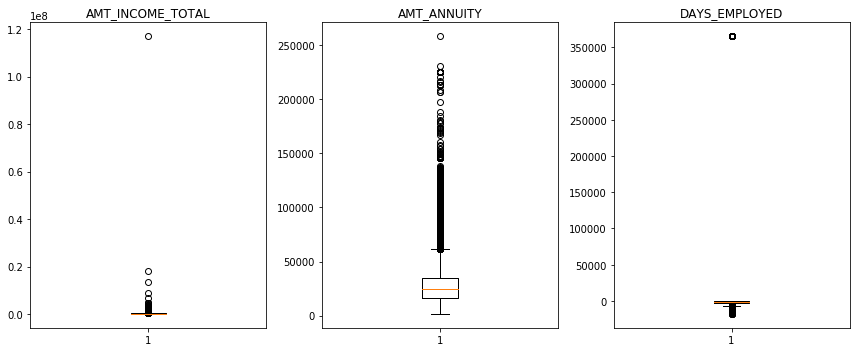

In [304]:
# plotting Subplots of Boxplots for outliers in Application Dataset

fig,(ax1,ax2,ax3) = plt.subplots(1,3, figsize = (12,5))

ax_1 = ax1.boxplot(df_app.AMT_INCOME_TOTAL)
ax1.set_title('AMT_INCOME_TOTAL')
ax_2 = ax2.boxplot(df_app.AMT_ANNUITY)
ax2.set_title('AMT_ANNUITY')
ax_3 = ax3.boxplot(df_app.DAYS_EMPLOYED)
ax3.set_title('DAYS_EMPLOYED')
plt.tight_layout()
plt.show()

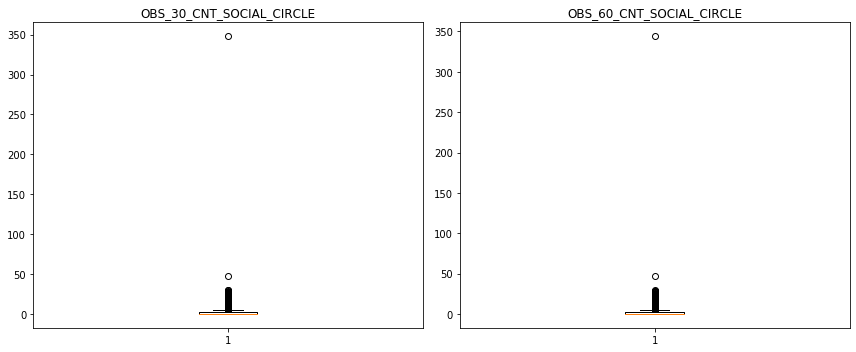

In [305]:
# plotting Subplots of Boxplots for outliers in Application Dataset

fig,(ax4,ax5) = plt.subplots(1,2, figsize = (12,5))

ax_4 = ax4.boxplot(df_app.OBS_30_CNT_SOCIAL_CIRCLE)
ax4.set_title('OBS_30_CNT_SOCIAL_CIRCLE')
ax_5 = ax5.boxplot(df_app.OBS_60_CNT_SOCIAL_CIRCLE)
ax5.set_title('OBS_60_CNT_SOCIAL_CIRCLE')

plt.tight_layout()
plt.show()

In [306]:
# Ignoring values above 99 percentiles of above column from Application Dataset

df_app = df_app[df_app['AMT_INCOME_TOTAL'] < 472500]
df_app = df_app[df_app['AMT_ANNUITY'] < 70006.5]
df_app = df_app[df_app['DAYS_EMPLOYED'] < 365243.0]
df_app = df_app[df_app['OBS_30_CNT_SOCIAL_CIRCLE'] < 10.0]
df_app = df_app[df_app['OBS_60_CNT_SOCIAL_CIRCLE'] < 10.0]

df_app.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648,-2120,1,1,0,1,1,0,1,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.262949,2,2,2,2,-1134,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186,-291,1,1,0,1,1,0,2,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,1,0,1,0,-828,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260,-2531,1,1,1,1,1,0,1,2,2,MONDAY,9,0,0,0,0,0,0,Government,0.555912,0,0,0,0,-815,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039,-9833,-2437,1,1,0,1,0,0,2,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,0.650442,2,0,2,0,-617,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,-19932,-3038,-4311,-3458,1,1,0,1,0,0,1,2,2,THURSDAY,11,0,0,0,0,1,1,Religion,0.322738,0,0,0,0,-1106,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0


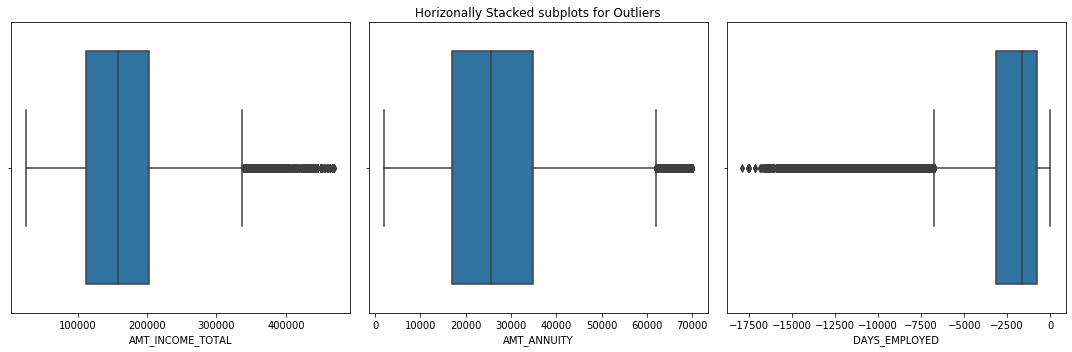

In [307]:
# Checking Variation of columns again.

fig,(ax1,ax2,ax3) = plt.subplots(1,3, figsize = (15,5))

ax_1 = sns.boxplot(df_app.AMT_INCOME_TOTAL, ax = ax1)

ax_2 = sns.boxplot(df_app.AMT_ANNUITY, ax = ax2)
ax2.set_title('Horizonally Stacked subplots for Outliers')
ax_3 = sns.boxplot(df_app.DAYS_EMPLOYED, ax= ax3)

plt.tight_layout()
plt.show()

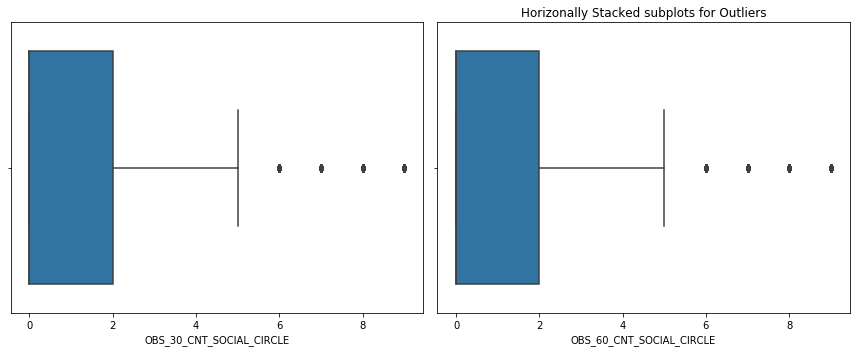

In [308]:
# Checking Variation of columns again.

fig,(ax4,ax5) = plt.subplots(1,2, figsize = (12,5))

ax_4 = sns.boxplot(df_app.OBS_30_CNT_SOCIAL_CIRCLE, ax = ax4)

ax_5 = sns.boxplot(df_app.OBS_60_CNT_SOCIAL_CIRCLE, ax = ax5)

ax5.set_title('Horizonally Stacked subplots for Outliers')

plt.tight_layout()

plt.show()

In [309]:
# Checking numerical summary of Columns of Application Dataset:

df_app.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_2,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21
count,243612.000000,243612.000000,243612.000000,243612.000000,2.436120e+05,243612.000000,2.436120e+05,243612.000000,243612.000000,243612.000000,243612.000000,243612.000000,243612.0,243612.000000,243612.000000,243612.000000,243612.000000,243612.000000,243612.000000,243612.000000,243612.000000,243612.000000,243612.000000,243612.000000,243612.000000,243612.000000,243612.000000,243612.000000,2.436120e+05,243612.000000,243612.000000,243612.000000,243612.000000,243612.000000,243612.000000,243612.000000,243612.000000,243612.000000,243612.000000,243612.000000,243612.00000,243612.000000,243612.000000,243612.000000,243612.000000,243612.000000,243612.000000,243612.000000,243612.000000,243612.000000,243612.000000,243612.000000,243612.000000,243612.000000
mean,278144.543360,0.087196,0.497993,168061.888553,5.983530e+05,27000.402449,5.366390e+05,0.020695,-14755.412139,-2376.951066,-4644.648191,-2797.002537,1.0,0.999955,0.244159,0.997968,0.276858,0.062062,2.250419,2.050958,2.030040,12.189999,0.016748,0.060346,0.048269,0.090422,0.282814,0.219981,5.145015e-01,1.273792,0.136024,1.258066,0.095603,-969.445573,0.000053,0.765878,0.000074,0.016218,0.008678,0.000172,0.09431,0.004363,0.000025,0.004622,0.000004,0.003969,0.003198,0.001342,0.011777,0.000312,0.009683,0.000718,0.000616,0.000406
std,102846.706844,0.282123,0.762611,76922.044672,3.912910e+05,13011.773222,3.574564e+05,0.013623,3664.168005,2336.486760,3251.727925,1515.145957,0.0,0.006720,0.429588,0.045031,0.447447,0.241268,0.942237,0.508429,0.502675,3.296068,0.128326,0.238127,0.214335,0.286787,0.450368,0.414234,1.898807e-01,1.924591,0.426222,1.907642,0.348125,825.893318,0.007305,0.423450,0.008596,0.126315,0.092749,0.013129,0.29226,0.065913,0.004963,0.067829,0.002026,0.062878,0.056458,0.036613,0.107881,0.017660,0.097927,0.026793,0.024806,0.020155
min,100002.000000,0.000000,0.000000,25650.000000,4.500000e+04,1980.000000,4.050000e+04,0.000290,-25200.000000,-17912.000000,-22928.000000,-7197.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.173617e-08,0.000000,0.000000,0.000000,0.000000,-4292.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,188964.750000,0.000000,0.000000,112500.000000,2.736360e+05,16875.000000,2.430000e+05,0.010006,-17552.000000,-3166.000000,-6964.000000,-4174.000000,1.0,1.000000,0.000000,1.000000,0.000000,0.000000,2.000000,2.000000,2.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.962544e-01,0.000000,0.000000,0.000000,0.000000,-1576.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,278152.500000,0.000000,0.000000,157500.000000,5.177880e+05,25537.500000,4.500000e+05,0.018850,-14561.000000,-1640.000000,-4276.000000,-2880.000000,1.0,1.000000,0

In [310]:
# Checking Shape of dataframe Application Dataset

df_app.shape

(243612, 65)

In [311]:
df_app.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648,-2120,1,1,0,1,1,0,1,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.262949,2,2,2,2,-1134,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186,-291,1,1,0,1,1,0,2,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,1,0,1,0,-828,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260,-2531,1,1,1,1,1,0,1,2,2,MONDAY,9,0,0,0,0,0,0,Government,0.555912,0,0,0,0,-815,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039,-9833,-2437,1,1,0,1,0,0,2,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,0.650442,2,0,2,0,-617,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,-19932,-3038,-4311,-3458,1,1,0,1,0,0,1,2,2,THURSDAY,11,0,0,0,0,1,1,Religion,0.322738,0,0,0,0,-1106,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0


#### 2.4.2 Binning the Continuous Variables

In [312]:
df_app['INCOME_RANGE'] = pd.qcut(df_app['AMT_INCOME_TOTAL'], [0, 0.20, 0.50, 0.90, 1.0], 
                                 labels = ['Low', 'Medium', 'High','Very High'])

In [313]:
df_app['INCOME_RANGE'].value_counts()

High         83210
Low          72201
Medium       67745
Very High    20456
Name: INCOME_RANGE, dtype: int64

In [314]:
df_app['Ratings_2'] = pd.qcut(df_app['EXT_SOURCE_2'], [0, 0.20, 0.50, 0.90, 1.0], 
                              labels = ['Low', 'Medium', 'High','Very High'])

In [315]:
df_app['Ratings_2'].value_counts()

High         97445
Medium       73083
Low          48723
Very High    24361
Name: Ratings_2, dtype: int64

In [316]:
# We can convert DAYS_BIRTH Column as AGE dividing it with 365.25

df_app['AGE'] = df_app['DAYS_BIRTH']// -365.25

In [317]:
df_app.AGE.value_counts()

38    8471
37    8392
39    8342
36    8321
27    8297
40    8275
31    8097
41    8068
43    7863
42    7764
28    7751
32    7570
30    7517
35    7433
33    7424
29    7416
44    7376
34    7373
45    6837
46    6786
47    6539
48    6491
49    6191
53    6173
54    6124
51    5854
52    5717
50    5705
26    4413
25    4064
23    3969
24    3828
55    3341
56    3019
22    2914
57    2604
59    2223
58    2167
60    1415
21    1250
61    1057
62     884
63     829
64     691
65     277
67     227
66     203
68      69
20       1
Name: AGE, dtype: int64

In [318]:
# Creating binned variable for AGE
df_app['AGE_GROUP'] = pd.cut(df_app['AGE'], bins = np.linspace(20,70, num = 11))

In [319]:
df_app['AGE_GROUP'].value_counts()

(35.0, 40.0]    41801
(40.0, 45.0]    37908
(30.0, 35.0]    37897
(25.0, 30.0]    35394
(45.0, 50.0]    31712
(50.0, 55.0]    27209
(20.0, 25.0]    16025
(55.0, 60.0]    11428
(60.0, 65.0]     3738
(65.0, 70.0]      499
Name: AGE_GROUP, dtype: int64

In [320]:
#Replacing CNT_CHILDREN morethan 3 TO 3+
df_app['CNT_CHILDREN'].replace(range(4,100),str('3+'),inplace=True)

In [321]:
# replacing  CNT_FAM_MEMBERS morethan 5 TO 5+
df_app['CNT_FAM_MEMBERS'].replace(range(6,100),str('5+'),inplace=True)

In [322]:
df_app.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,INCOME_RANGE,Ratings_2,AGE,AGE_GROUP
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648,-2120,1,1,0,1,1,0,1,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.262949,2,2,2,2,-1134,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,High,Low,25,"(20.0, 25.0]"
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186,-291,1,1,0,1,1,0,2,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,1,0,1,0,-828,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,High,High,45,"(40.0, 45.0]"
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260,-2531,1,1,1,1,1,0,1,2,2,MONDAY,9,0,0,0,0,0,0,Government,0.555912,0,0,0,0,-815,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Low,Medium,52,"(50.0, 55.0]"
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039,-9833,-2437,1,1,0,1,0,0,2,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,0.650442,2,0,2,0,-617,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Medium,High,52,"(50.0, 55.0]"
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,-19932,-3038,-4311,-3458,1,1,0,1,0,0,1,2,2,THURSDAY,11,0,0,0,0,1,1,Religion,0.322738,0,0,0,0,-1106,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,Medium,Low,54,"(50.0, 55.0]"


### 3. Imbalance of Data

In [323]:
df_app['TARGET'].value_counts()

0    222370
1     21242
Name: TARGET, dtype: int64

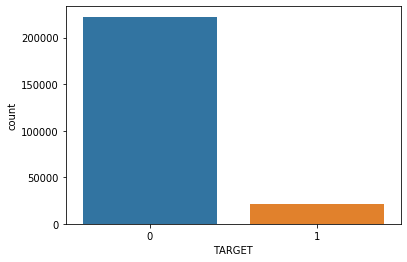

In [324]:
sns.countplot(df_app['TARGET'])
plt.show()

In [325]:
 df_app['TARGET'].value_counts(normalize= True)*100

0    91.280397
1     8.719603
Name: TARGET, dtype: float64

We can see that the Application data has high imbalance with Defaulted population at 8.7% as compared to Non-Defaulted population at 91.3% imbalance ratio is 100/8.7 = 11.4

### 4. Catergorical Variables Analysis:
A categorical variable (sometimes called a nominal variable) is one that has two or more categories, but there is no intrinsic ordering to the categories.
- NAME_CONTRACT_TYPE
- CODE_GENDER
- FLAG_OWN_CAR
- FLAG_OWN_REALTY
- NAME_FAMILY_STATUS
- FLAG_EMP_PHONE
- FLAG_CONT_MOBILE
- FLAG_PHONE
- FLAG_EMAIL
- REG_REGION_NOT_LIVE_REGION
- REG_REGION_NOT_WORK_REGION
- LIVE_REGION_NOT_WORK_REGION
- REG_CITY_NOT_LIVE_CITY
- REG_CITY_NOT_WORK_CITY
- LIVE_CITY_NOT_WORK_CITY
- FLAG_DOCUMENT_2
- FLAG_DOCUMENT_3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21

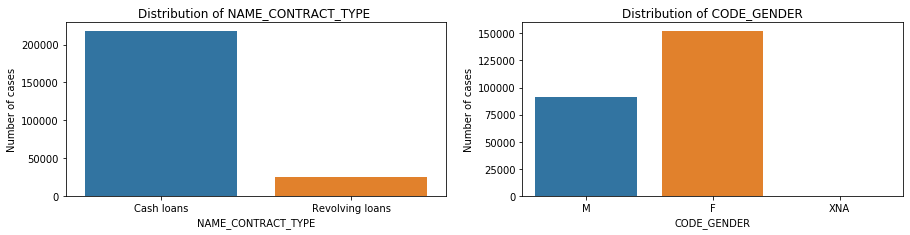

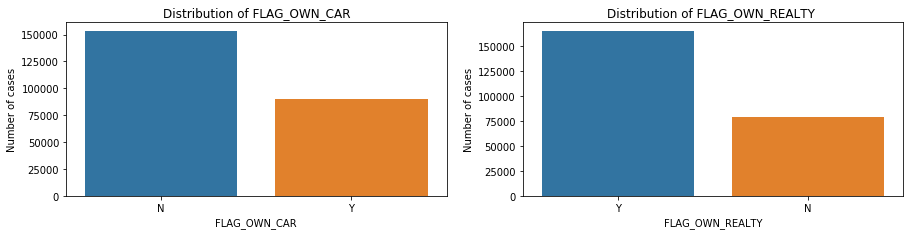

In [326]:
# Plotting distribution of Columns 'NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 
#'FLAG_OWN_REALTY' vs. 'Number of Cases'


plt.figure(figsize=(15,30))
plt.subplot(8, 2, 1)
sns.countplot('NAME_CONTRACT_TYPE',data= df_app)
plt.title('Distribution of NAME_CONTRACT_TYPE ')
plt.xlabel('NAME_CONTRACT_TYPE')
plt.ylabel('Number of cases')

plt.subplot(8, 2, 2)
sns.countplot('CODE_GENDER', data= df_app)
plt.title('Distribution of CODE_GENDER')
plt.xlabel('CODE_GENDER')
plt.ylabel('Number of cases')

plt.figure(figsize=(15,30))
plt.subplot(8, 2, 3)
sns.countplot('FLAG_OWN_CAR', data= df_app)
plt.title('Distribution of FLAG_OWN_CAR')
plt.xlabel('FLAG_OWN_CAR')
plt.ylabel('Number of cases')

plt.subplot(8, 2, 4)
sns.countplot('FLAG_OWN_REALTY', data= df_app)
plt.title('Distribution of FLAG_OWN_REALTY ')
plt.xticks(Rotation=0)
plt.xlabel('FLAG_OWN_REALTY')
plt.ylabel('Number of cases')

plt.show()

In [327]:
df_app.NAME_CONTRACT_TYPE.value_counts(normalize= True)*100

Cash loans         89.694268
Revolving loans    10.305732
Name: NAME_CONTRACT_TYPE, dtype: float64

In [328]:
df_app.CODE_GENDER.value_counts(normalize= True)*100

F      62.615963
M      37.382805
XNA     0.001231
Name: CODE_GENDER, dtype: float64

In [329]:
df_app.FLAG_OWN_CAR.value_counts(normalize= True)*100

N    63.048208
Y    36.951792
Name: FLAG_OWN_CAR, dtype: float64

In [330]:
df_app.FLAG_OWN_REALTY.value_counts(normalize= True)*100

Y    67.783607
N    32.216393
Name: FLAG_OWN_REALTY, dtype: float64

#### Observations:
- Case loans are preferred more compared to Revolving loans.
- XNA has less impact over Number of cases, clearly number of cases for Female is High.
- Amoung the population, 63% of them does not own the Car.
- 67.78% of Populations own a House or Flat.

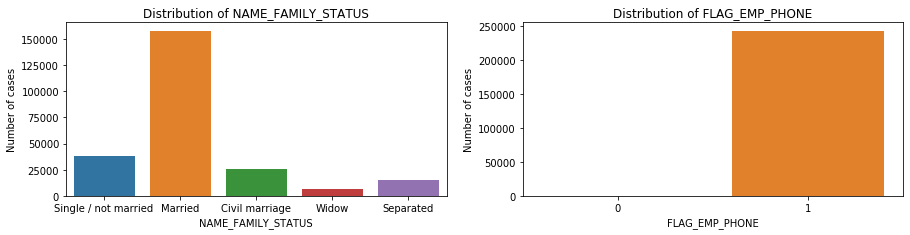

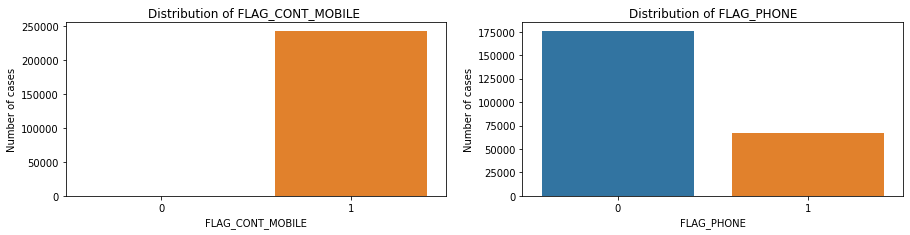

In [331]:
# Plotting distribution of Columns 'NAME_FAMILY_STATUS', 'FLAG_EMP_PHONE', 'FLAG_CONT_MOBILE', 
# 'FLAG_PHONE' vs. 'Number of Cases'

plt.figure(figsize=(15,30))
plt.subplot(8, 2, 5)
sns.countplot('NAME_FAMILY_STATUS', data= df_app)
plt.title('Distribution of NAME_FAMILY_STATUS')
plt.xlabel('NAME_FAMILY_STATUS')
plt.ylabel('Number of cases')

plt.subplot(8, 2, 6)
sns.countplot('FLAG_EMP_PHONE', data= df_app)
plt.title('Distribution of FLAG_EMP_PHONE')
plt.xlabel('FLAG_EMP_PHONE')
plt.ylabel('Number of cases')

plt.figure(figsize=(15,30))
plt.subplot(8, 2, 7)
sns.countplot('FLAG_CONT_MOBILE', data= df_app)
plt.title('Distribution of FLAG_CONT_MOBILE ')
plt.xlabel('FLAG_CONT_MOBILE')
plt.ylabel('Number of cases')

plt.subplot(8, 2, 8)
sns.countplot('FLAG_PHONE', data= df_app)
plt.title('Distribution of FLAG_PHONE')
plt.xlabel('FLAG_PHONE')
plt.ylabel('Number of cases')

plt.show()

In [332]:
df_app.NAME_FAMILY_STATUS.value_counts(normalize= True)*100

Married                 64.787038
Single / not married    15.679031
Civil marriage          10.455560
Separated                6.387616
Widow                    2.690754
Name: NAME_FAMILY_STATUS, dtype: float64

In [333]:
df_app.FLAG_EMP_PHONE.value_counts(normalize= True)*100

1    99.995485
0     0.004515
Name: FLAG_EMP_PHONE, dtype: float64

In [334]:
df_app.FLAG_CONT_MOBILE.value_counts(normalize= True)*100

1    99.796808
0     0.203192
Name: FLAG_CONT_MOBILE, dtype: float64

In [335]:
df_app.FLAG_PHONE.value_counts(normalize= True)*100

0    72.314172
1    27.685828
Name: FLAG_PHONE, dtype: float64

#### Observations:
- Number of cases are high for married people among the Family status.
- 99.99% of Client have provided work phone.
- only 0.2% clients where not reacheable on mobile phones.
- 72.31% of clients provided home phone number.

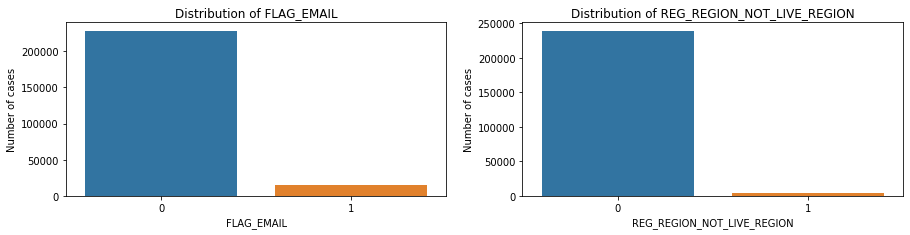

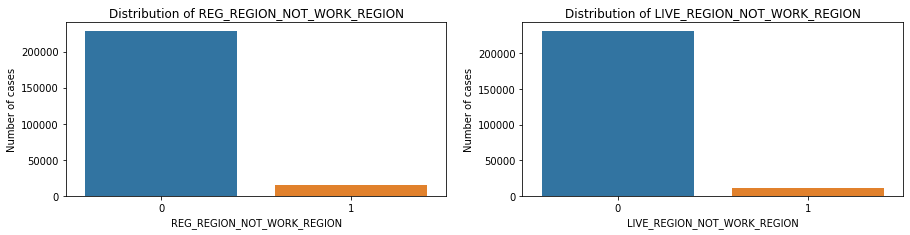

In [336]:
# Plotting distribution of Columns 'FLAG_EMAIL', 'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION', 
# 'LIVE_REGION_NOT_WORK_REGION' vs. 'Number of Cases'

plt.figure(figsize=(15,30))
plt.subplot(8, 2, 9)
sns.countplot('FLAG_EMAIL', data= df_app)
plt.title('Distribution of FLAG_EMAIL')
plt.xlabel('FLAG_EMAIL')
plt.ylabel('Number of cases')

plt.subplot(8, 2, 10)
sns.countplot('REG_REGION_NOT_LIVE_REGION', data= df_app)
plt.title('Distribution of REG_REGION_NOT_LIVE_REGION')
plt.xlabel('REG_REGION_NOT_LIVE_REGION')
plt.ylabel('Number of cases')

plt.figure(figsize=(15,30))
plt.subplot(8, 2, 11)
sns.countplot('REG_REGION_NOT_WORK_REGION', data= df_app)
plt.title('Distribution of REG_REGION_NOT_WORK_REGION')
plt.xlabel('REG_REGION_NOT_WORK_REGION')
plt.ylabel('Number of cases')

plt.subplot(8, 2, 12)
sns.countplot('LIVE_REGION_NOT_WORK_REGION', data= df_app)
plt.title('Distribution of LIVE_REGION_NOT_WORK_REGION')
plt.xlabel('LIVE_REGION_NOT_WORK_REGION')
plt.ylabel('Number of cases')

plt.show()

In [337]:
df_app.FLAG_EMAIL.value_counts(normalize= True)*100

0    93.79382
1     6.20618
Name: FLAG_EMAIL, dtype: float64

In [338]:
df_app.REG_REGION_NOT_LIVE_REGION.value_counts(normalize= True)*100

0    98.325206
1     1.674794
Name: REG_REGION_NOT_LIVE_REGION, dtype: float64

In [339]:
df_app.REG_REGION_NOT_WORK_REGION.value_counts(normalize= True)*100

0    93.965404
1     6.034596
Name: REG_REGION_NOT_WORK_REGION, dtype: float64

In [340]:
df_app.LIVE_REGION_NOT_WORK_REGION.value_counts(normalize= True)*100

0    95.173062
1     4.826938
Name: LIVE_REGION_NOT_WORK_REGION, dtype: float64

#### Observations:
- 93.79% of clients does not provided email for contact.
- 1.67% of clients registered address does not matches with contact address at region level.
- 6.03% of clients registered work address does not matches with work address address at region level.
- only 4.82% clients have different contact & work address address at region level.

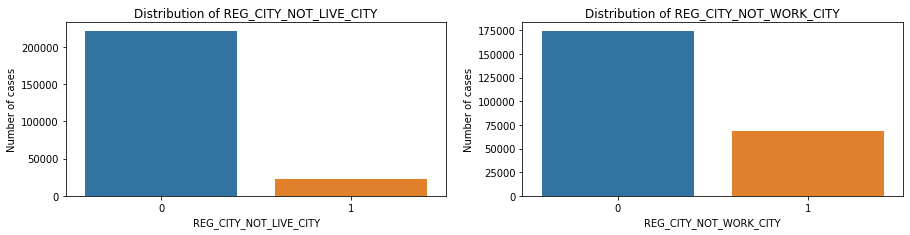

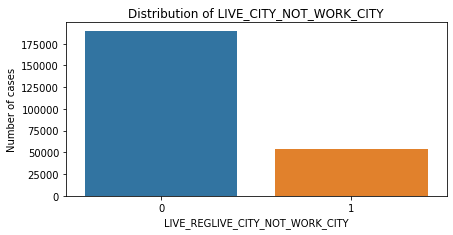

In [341]:
# Plotting distribution of Columns 'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY', 
# 'LIVE_CITY_NOT_WORK_CITY' vs. 'Number of Cases'

plt.figure(figsize=(15,30))
plt.subplot(8, 2, 13)
sns.countplot('REG_CITY_NOT_LIVE_CITY', data= df_app)
plt.title('Distribution of REG_CITY_NOT_LIVE_CITY')
plt.xlabel('REG_CITY_NOT_LIVE_CITY')
plt.ylabel('Number of cases')

plt.subplot(8, 2, 14)
sns.countplot('REG_CITY_NOT_WORK_CITY', data= df_app)
plt.title('Distribution of REG_CITY_NOT_WORK_CITY')
plt.xlabel('REG_CITY_NOT_WORK_CITY')
plt.ylabel('Number of cases')


plt.figure(figsize=(15,30))
plt.subplot(8, 2, 15)
sns.countplot('LIVE_CITY_NOT_WORK_CITY', data= df_app)
plt.title('Distribution of LIVE_CITY_NOT_WORK_CITY', )
plt.xlabel('LIVE_REGLIVE_CITY_NOT_WORK_CITY')
plt.ylabel('Number of cases')

plt.show()

In [342]:
df_app.REG_CITY_NOT_LIVE_CITY.value_counts(normalize= True)*100

0    90.957752
1     9.042248
Name: REG_CITY_NOT_LIVE_CITY, dtype: float64

In [343]:
df_app.REG_CITY_NOT_WORK_CITY.value_counts(normalize= True)*100

0    71.718552
1    28.281448
Name: REG_CITY_NOT_WORK_CITY, dtype: float64

In [344]:
df_app.LIVE_CITY_NOT_WORK_CITY.value_counts(normalize= True)*100

0    78.001905
1    21.998095
Name: LIVE_CITY_NOT_WORK_CITY, dtype: float64

#### Observations:
- 9.04% of client's permanent address does not matches with contact address at city level.
- 28.28% of client's permanent address does not match work address at city level.
- 21.99 % of client's contact address does not match work address at city level.

In [345]:
# Dropping columns 'FLAG_EMP_PHONE','FLAG_CONT_MOBILE'

df_app = df_app.drop(['FLAG_EMP_PHONE','FLAG_CONT_MOBILE'],axis=1)

df_app.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,INCOME_RANGE,Ratings_2,AGE,AGE_GROUP
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648,-2120,1,0,1,0,1,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.262949,2,2,2,2,-1134,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,High,Low,25,"(20.0, 25.0]"
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186,-291,1,0,1,0,2,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,1,0,1,0,-828,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,High,High,45,"(40.0, 45.0]"
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260,-2531,1,1,1,0,1,2,2,MONDAY,9,0,0,0,0,0,0,Government,0.555912,0,0,0,0,-815,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Low,Medium,52,"(50.0, 55.0]"
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039,-9833,-2437,1,0,0,0,2,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,0.650442,2,0,2,0,-617,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Medium,High,52,"(50.0, 55.0]"
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,-19932,-3038,-4311,-3458,1,0,0,0,1,2,2,THURSDAY,11,0,0,0,0,1,1,Religion,0.322738,0,0,0,0,-1106,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,Medium,Low,54,"(50.0, 55.0]"


### 4.1 Ordinal Variables: 
An ordinal variable is similar to a categorical variable.  The difference between the two is that there is a clear ordering of the variables.
- CNT_CHILDREN
- NAME_TYPE_SUITE
- NAME_INCOME_TYPE
- NAME_EDUCATION_TYPE
- NAME_FAMILY_STATUS	
- NAME_HOUSING_TYPE
- CNT_FAM_MEMBERS	
- REGION_RATING_CLIENT
- REGION_RATING_CLIENT_W_CITY	
- WEEKDAY_APPR_PROCESS_START
- HOUR_APPR_PROCESS_START
- ORGANIZATION_TYPE

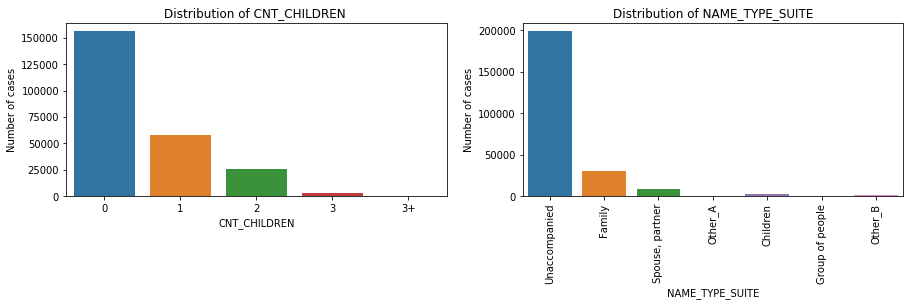

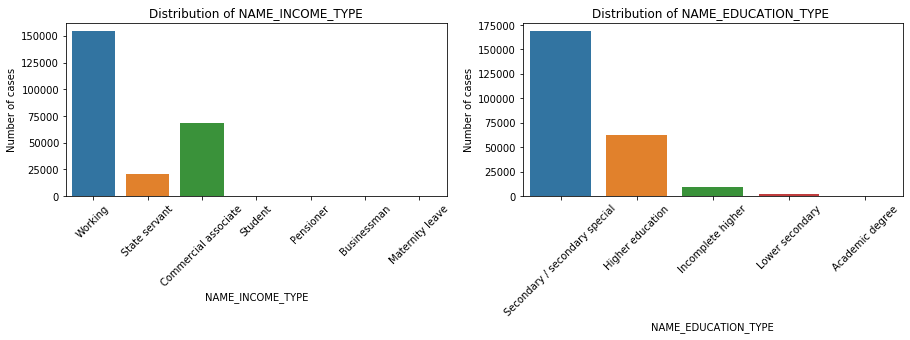

In [346]:
# Plotting distribution between column 'CNT_CHILDREN' , 'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 
# 'NAME_EDUCATION_TYPE' Vs. Number of Cases

plt.figure(figsize=(15,30))
plt.subplot(8, 2, 1)
sns.countplot('CNT_CHILDREN',data= df_app)
plt.title('Distribution of CNT_CHILDREN ')
plt.xticks(rotation=0)
plt.xlabel('CNT_CHILDREN')
plt.ylabel('Number of cases')

plt.subplot(8, 2, 2)
sns.countplot('NAME_TYPE_SUITE', data= df_app)
plt.title('Distribution of NAME_TYPE_SUITE')
plt.xticks(rotation=90)
plt.xlabel('NAME_TYPE_SUITE')
plt.ylabel('Number of cases')


plt.figure(figsize=(15,30))
plt.subplot(8, 2, 3)
sns.countplot('NAME_INCOME_TYPE', data= df_app)
plt.title('Distribution of NAME_INCOME_TYPE')
plt.xticks(rotation=45)
plt.xlabel('NAME_INCOME_TYPE')
plt.ylabel('Number of cases')


plt.subplot(8, 2, 4)
sns.countplot('NAME_EDUCATION_TYPE', data= df_app)
plt.title('Distribution of NAME_EDUCATION_TYPE ')
plt.xticks(Rotation=45)
plt.xlabel('NAME_EDUCATION_TYPE')
plt.ylabel('Number of cases')

plt.show()

In [347]:
df_app.CNT_CHILDREN.value_counts(normalize= True)*100

0     64.223437
1     23.702855
2     10.435857
3      1.426038
3+     0.211812
Name: CNT_CHILDREN, dtype: float64

In [348]:
df_app.NAME_TYPE_SUITE.value_counts(normalize= True)*100

Unaccompanied      81.776349
Family             12.531813
Spouse, partner     3.817956
Children            0.902665
Other_B             0.581663
Other_A             0.304172
Group of people     0.085382
Name: NAME_TYPE_SUITE, dtype: float64

In [349]:
df_app.NAME_INCOME_TYPE.value_counts(normalize= True)*100

Working                 63.455002
Commercial associate    27.927196
State servant            8.603435
Student                  0.006978
Pensioner                0.004105
Maternity leave          0.001642
Businessman              0.001642
Name: NAME_INCOME_TYPE, dtype: float64

In [350]:
df_app.NAME_EDUCATION_TYPE.value_counts(normalize= True)*100

Secondary / secondary special    69.337307
Higher education                 25.832471
Incomplete higher                 3.863521
Lower secondary                   0.914569
Academic degree                   0.052132
Name: NAME_EDUCATION_TYPE, dtype: float64

#### Obervations:
- Approx. 97% Number of children the client has between 0 to 2.
- 81.77% of client came Unaccompanied for process.
- Mostly clients incame type is working, Commercial associate & state servant.
- Level of highest education the client achieved are 69.33% for Secondary/ secondary special & 25.83% Higher education.

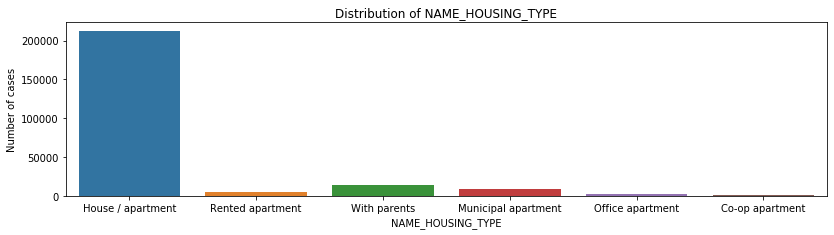

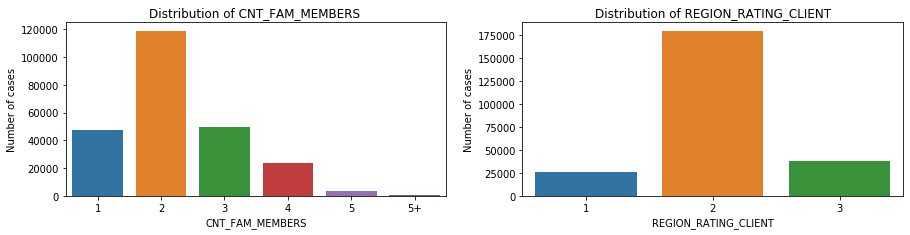

In [351]:
# Plotting distribution between column 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'CNT_FAM_MEMBERS',
# 'REGION_RATING_CLIENT' Vs. Number of Cases

plt.figure(figsize=(30,30))

plt.subplot(8, 2, 6)
sns.countplot('NAME_HOUSING_TYPE', data= df_app)
plt.title('Distribution of NAME_HOUSING_TYPE')
plt.xticks(rotation=0)
plt.xlabel('NAME_HOUSING_TYPE')
plt.ylabel('Number of cases')

plt.figure(figsize=(15,30))
plt.subplot(8, 2, 7)
sns.countplot('CNT_FAM_MEMBERS', data= df_app)
plt.title('Distribution of CNT_FAM_MEMBERS ')
plt.xticks(rotation=0)
plt.xlabel('CNT_FAM_MEMBERS')
plt.ylabel('Number of cases')

plt.subplot(8, 2, 8)
sns.countplot('REGION_RATING_CLIENT', data= df_app)
plt.title('Distribution of REGION_RATING_CLIENT')
plt.xticks(rotation=0)
plt.xlabel('REGION_RATING_CLIENT')
plt.ylabel('Number of cases')

plt.show()

In [352]:
df_app.NAME_HOUSING_TYPE.value_counts(normalize= True)*100

House / apartment      87.338062
With parents            5.859317
Municipal apartment     3.621743
Rented apartment        1.874292
Office apartment        0.908822
Co-op apartment         0.397764
Name: NAME_HOUSING_TYPE, dtype: float64

In [353]:
df_app.CNT_FAM_MEMBERS.value_counts(normalize= True)*100

2     48.832570
3     20.420997
1     19.571696
4      9.630067
5      1.341477
5+     0.203192
Name: CNT_FAM_MEMBERS, dtype: float64

In [354]:
df_app.REGION_RATING_CLIENT.value_counts(normalize= True)*100

2    73.890449
3    15.602680
1    10.506872
Name: REGION_RATING_CLIENT, dtype: float64

#### Observations:
- 87.33% of client's living in own House/Flats.
- 48.83 % clients have family member count as 2, 20.42% have members as 3 & 19.57% have member count as 1.
- 73.89 % of clients lives rated 2 region.

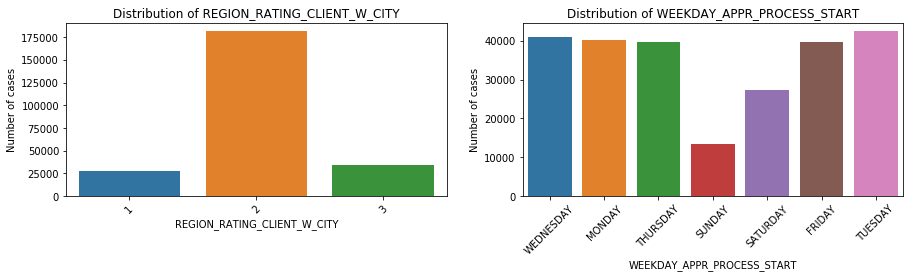

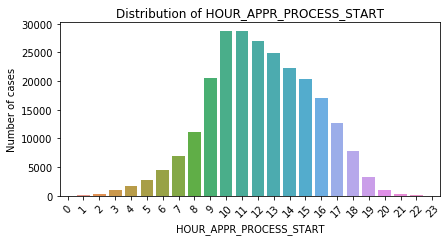

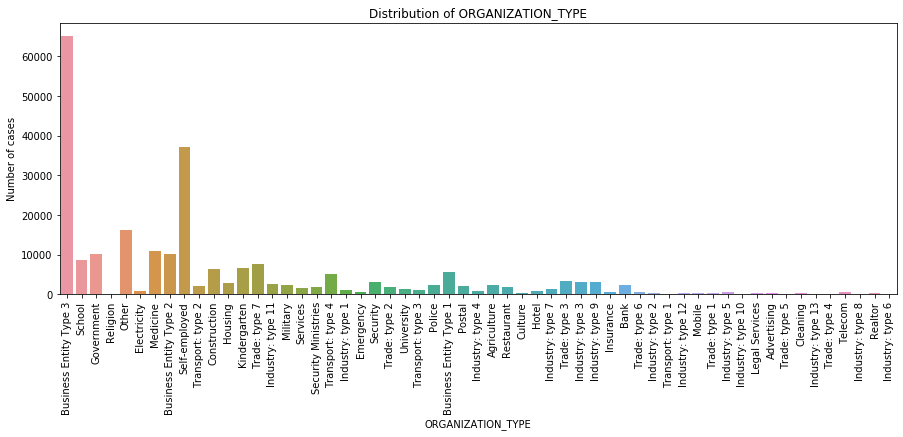

In [355]:
# Plotting distribution between column 'REGION_RATING_CLIENT_W_CITY', 'WEEKDAY_APPR_PROCESS_START', 
# 'HOUR_APPR_PROCESS_START', 'ORGANIZATION_TYPE' Vs. Number of Cases

plt.figure(figsize=(15,30))
plt.subplot(8, 2, 9)
sns.countplot('REGION_RATING_CLIENT_W_CITY', data= df_app)
plt.title('Distribution of REGION_RATING_CLIENT_W_CITY')
plt.xticks(rotation=45)
plt.xlabel('REGION_RATING_CLIENT_W_CITY')
plt.ylabel('Number of cases')

plt.subplot(8, 2, 10)
sns.countplot('WEEKDAY_APPR_PROCESS_START', data= df_app)
plt.title('Distribution of WEEKDAY_APPR_PROCESS_START')
plt.xticks(rotation=45)
plt.xlabel('WEEKDAY_APPR_PROCESS_START')
plt.ylabel('Number of cases')

plt.figure(figsize=(15,30))
plt.subplot(8, 2, 11)
sns.countplot('HOUR_APPR_PROCESS_START', data= df_app)
plt.title('Distribution of HOUR_APPR_PROCESS_START')
plt.xticks(rotation=45)
plt.xlabel('HOUR_APPR_PROCESS_START')
plt.ylabel('Number of cases')

plt.figure(figsize=(15,5))
sns.countplot('ORGANIZATION_TYPE', data= df_app)
plt.title('Distribution of ORGANIZATION_TYPE')
plt.xticks(rotation=90)
plt.xlabel('ORGANIZATION_TYPE')
plt.ylabel('Number of cases')

plt.show()

In [356]:
df_app.REGION_RATING_CLIENT_W_CITY.value_counts(normalize= True)*100

2    74.641643
3    14.181157
1    11.177200
Name: REGION_RATING_CLIENT_W_CITY, dtype: float64

In [357]:
df_app.WEEKDAY_APPR_PROCESS_START.value_counts(normalize= True)*100

TUESDAY      17.437975
WEDNESDAY    16.776678
MONDAY       16.495493
THURSDAY     16.312415
FRIDAY       16.234011
SATURDAY     11.255193
SUNDAY        5.488235
Name: WEEKDAY_APPR_PROCESS_START, dtype: float64

In [358]:
df_app.HOUR_APPR_PROCESS_START.value_counts(normalize= True)*100

11    11.827825
10    11.810995
12    11.062673
13    10.188743
14     9.154721
9      8.446218
15     8.364530
16     7.018127
17     5.233732
8      4.599527
18     3.222748
7      2.838530
6      1.820928
19     1.359949
5      1.162094
4      0.682643
20     0.428961
3      0.408026
21     0.145313
2      0.105085
22     0.056237
1      0.032018
23     0.015188
0      0.015188
Name: HOUR_APPR_PROCESS_START, dtype: float64

In [359]:
df_app.ORGANIZATION_TYPE.value_counts(normalize= True)*100

Business Entity Type 3    26.774543
Self-employed             15.286603
Other                      6.637194
Medicine                   4.469402
Business Entity Type 2     4.209563
Government                 4.159894
School                     3.555654
Trade: type 7              3.112737
Kindergarten               2.765053
Construction               2.655042
Business Entity Type 1     2.364416
Transport: type 4          2.139057
Trade: type 3              1.400588
Industry: type 9           1.316848
Industry: type 3           1.316848
Security                   1.291398
Housing                    1.180566
Industry: type 11          1.081638
Military                   1.024580
Agriculture                0.983121
Bank                       0.979016
Police                     0.921547
Transport: type 2          0.880909
Postal                     0.863668
Security Ministries        0.769667
Trade: type 2              0.730260
Restaurant                 0.723692
Services                   0

#### Observations:
- 74.64 % of clients lives in a region where rating is 2, taking city into account.
- Weekdays have mostly same distribution of loan applications.
- Working housr have high distribution of loan application.
- Mostly clients work in Business Entity Type 3 naming 26.77% & 15.28 % of clinets works as Self-employed.

### 4.2 Bi-Variate Analysis

In [360]:
# Splitting Data W.r.t. Target 0 and Target 1

target_0 = df_app[df_app['TARGET']== 0]
target_1 = df_app[df_app['TARGET']== 1]

In [361]:
target_0.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,INCOME_RANGE,Ratings_2,AGE,AGE_GROUP
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186,-291,1,0,1,0,2,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,1,0,1,0,-828,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,High,High,45,"(40.0, 45.0]"
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260,-2531,1,1,1,0,1,2,2,MONDAY,9,0,0,0,0,0,0,Government,0.555912,0,0,0,0,-815,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Low,Medium,52,"(50.0, 55.0]"
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039,-9833,-2437,1,0,0,0,2,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,0.650442,2,0,2,0,-617,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Medium,High,52,"(50.0, 55.0]"
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,-19932,-3038,-4311,-3458,1,0,0,0,1,2,2,THURSDAY,11,0,0,0,0,1,1,Religion,0.322738,0,0,0,0,-1106,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,Medium,Low,54,"(50.0, 55.0]"
5,100008,0,Cash loans,M,N,Y,0,99000.0,490495.5,27517.5,454500.0,"Spouse, partner",State servant,Secondary / secondary special,Married,House / apartment,0.035792,-16941,-1588,-4970,-477,1,1,1,0,2,2,2,WEDNESDAY,16,0,0,0,0,0,0,Other,0.354225,0,0,0,0,-2536,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Low,Medium,46,"(45.0, 50.0]"


In [362]:
target_1.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,INCOME_RANGE,Ratings_2,AGE,AGE_GROUP
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648,-2120,1,0,1,0,1,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.262949,2,2,2,2,-1134,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,High,Low,25,"(20.0, 25.0]"
40,100047,1,Cash loans,M,N,Y,0,202500.0,1193580.0,35028.0,855000.0,Unaccompanied,Commercial associate,Secondary / secondary special,Married,House / apartment,0.025164,-17482,-1262,-1182,-1029,1,0,0,0,2,2,2,TUESDAY,9,0,0,0,0,0,0,Business Entity Type 3,0.306841,0,0,0,0,-1075,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,High,Low,47,"(45.0, 50.0]"
42,100049,1,Cash loans,F,N,N,0,135000.0,288873.0,16258.5,238500.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.007305,-13384,-3597,-45,-4409,1,1,1,0,2,3,3,THURSDAY,11,0,0,0,0,0,0,Self-employed,0.674203,1,0,1,0,-1480,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Medium,High,36,"(35.0, 40.0]"
94,100112,1,Cash loans,M,Y,Y,0,315000.0,953460.0,64107.0,900000.0,Family,Commercial associate,Incomplete higher,Single / not married,With parents,0.030755,-10199,-2015,-4802,-1038,1,0,0,0,1,2,2,SUNDAY,13,0,0,0,0,1,1,Industry: type 4,0.432340,0,0,0,0,-591,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Very High,Medium,27,"(25.0, 30.0]"
110,100130,1,Cash loans,F,N,Y,1,157500.0,723996.0,30802.5,585000.0,Unaccompanied,Commercial associate,Incomplete higher,Separated,House / apartment,0.007274,-10526,-267,-387,-3190,1,0,1,0,2,2,2,SUNDAY,12,0,1,1,0,1,1,Trade: type 2,0.282069,0,0,0,0,-56,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Medium,Low,28,"(25.0, 30.0]"


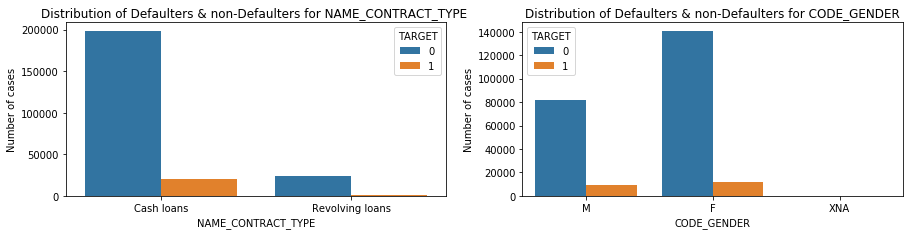

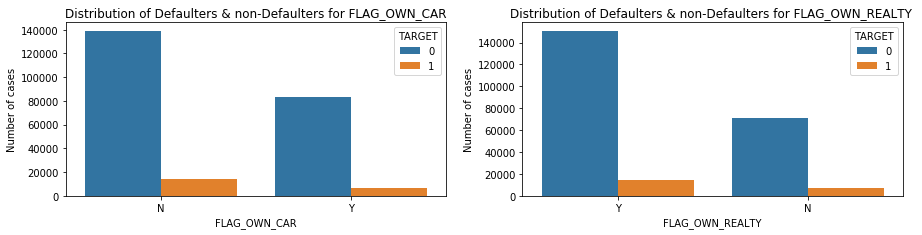

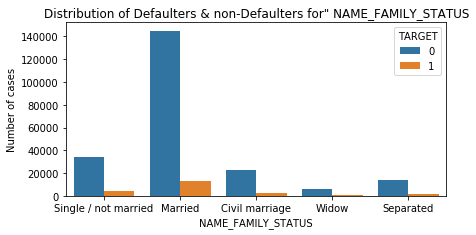

In [363]:
# Plotting distribution between column 'NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR',
# 'FLAG_OWN_REALTY' Vs. Number of Cases Vs. Target

plt.figure(figsize=(15,30))
plt.subplot(8, 2, 1)
sns.countplot('NAME_CONTRACT_TYPE',data= df_app,hue='TARGET')
plt.title('Distribution of Defaulters & non-Defaulters for NAME_CONTRACT_TYPE ')
plt.xlabel('NAME_CONTRACT_TYPE')
plt.ylabel('Number of cases')

plt.subplot(8, 2, 2)
sns.countplot('CODE_GENDER', data= df_app,hue='TARGET')
plt.title('Distribution of Defaulters & non-Defaulters for CODE_GENDER')
plt.xlabel('CODE_GENDER')
plt.ylabel('Number of cases')


plt.figure(figsize=(15,30))
plt.subplot(8, 2, 3)
sns.countplot('FLAG_OWN_CAR', data= df_app,hue='TARGET')
plt.title('Distribution of Defaulters & non-Defaulters for FLAG_OWN_CAR')
plt.xlabel('FLAG_OWN_CAR')
plt.ylabel('Number of cases')


plt.subplot(8, 2, 4)
sns.countplot('FLAG_OWN_REALTY', data= df_app,hue='TARGET')
plt.title('Distribution of Defaulters & non-Defaulters for FLAG_OWN_REALTY ')
plt.xticks(Rotation=0)
plt.xlabel('FLAG_OWN_REALTY')
plt.ylabel('Number of cases')

plt.figure(figsize=(15,30))
plt.subplot(8, 2, 5)
sns.countplot('NAME_FAMILY_STATUS', data= df_app,hue='TARGET')
plt.title('Distribution of Defaulters & non-Defaulters for" NAME_FAMILY_STATUS')
plt.xlabel('NAME_FAMILY_STATUS')
plt.ylabel('Number of cases')

plt.show()

#### Observations:
- Revolving loans are lesser in the defaulted population.So we can say that the revolving loans are comparatively safer.
- XNA have no impact on defaulter and non-defaulter population.
- Clearly famales have less defaulter compared to Males.
- Clients who owns car have little more defaulter rate compared to who do not own a car.
- Clients who owns house/flat & does not own house/flat have very very less difference been a defaulter.
- Number of cases are high for married people among the Family status.

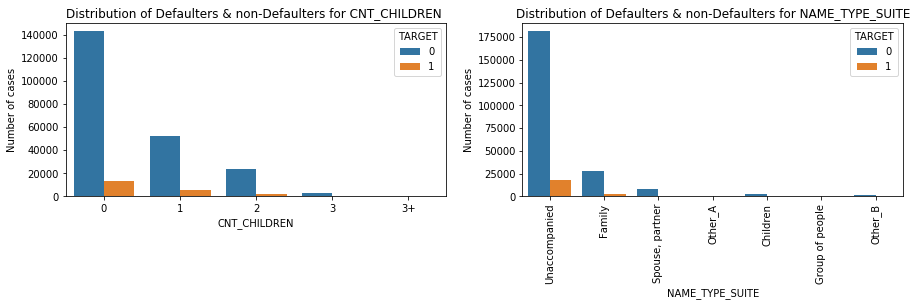

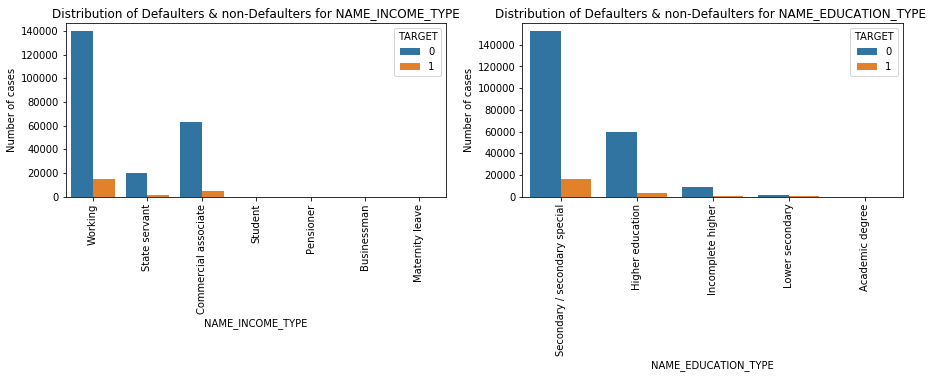

In [364]:
# Plotting distribution between column 'CNT_CHILDREN','NAME_TYPE_SUITE','NAME_INCOME_TYPE',
# 'NAME_EDUCATION_TYPE' Vs. Number of Cases  Vs. Target

plt.figure(figsize=(15,30))
plt.subplot(8, 2, 1)
sns.countplot('CNT_CHILDREN',data= df_app,hue='TARGET')
plt.title('Distribution of Defaulters & non-Defaulters for CNT_CHILDREN ')
plt.xticks(rotation=0)
plt.xlabel('CNT_CHILDREN')
plt.ylabel('Number of cases')

plt.subplot(8, 2, 2)
sns.countplot('NAME_TYPE_SUITE', data= df_app,hue='TARGET')
plt.title('Distribution of Defaulters & non-Defaulters for NAME_TYPE_SUITE')
plt.xticks(rotation=90)
plt.xlabel('NAME_TYPE_SUITE')
plt.ylabel('Number of cases')


plt.figure(figsize=(15,30))
plt.subplot(8, 2, 3)
sns.countplot('NAME_INCOME_TYPE', data= df_app,hue='TARGET')
plt.title('Distribution of Defaulters & non-Defaulters for NAME_INCOME_TYPE')
plt.xticks(rotation=90)
plt.xlabel('NAME_INCOME_TYPE')
plt.ylabel('Number of cases')


plt.subplot(8, 2, 4)
sns.countplot('NAME_EDUCATION_TYPE', data= df_app,hue='TARGET')
plt.title('Distribution of Defaulters & non-Defaulters for NAME_EDUCATION_TYPE ')
plt.xticks(Rotation=90)
plt.xlabel('NAME_EDUCATION_TYPE')
plt.ylabel('Number of cases')

plt.show()

#### Observations:
- CNT_CHILDREN: Clients who have number of children have little high defaulter rate than 0 & 2 childrens.
- NAME_TYPE_SUITE: Who was accompanying client when he was applying for the loan have no specific impact on defaulter rate.
- NAME_INCOME_TYPE: Clients income type as Working have little high defaulter rate compare to other income type.
- NAME_EDUCATION_TYPE: Secondary / secondary special have high defaulter rate compared to other education type.

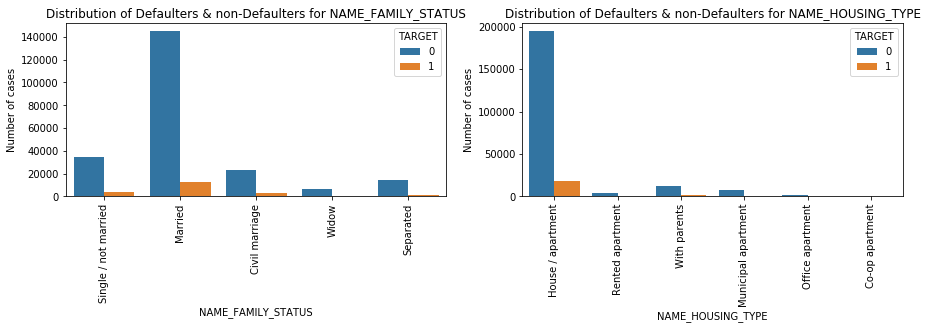

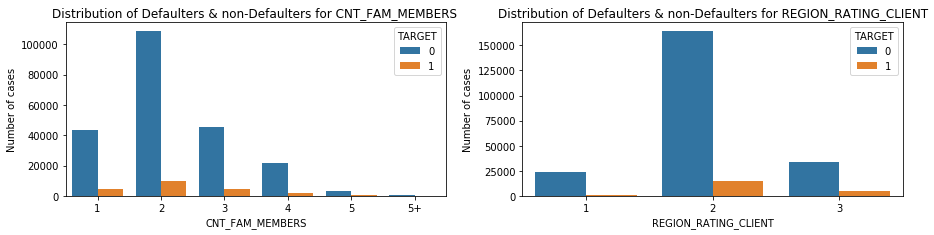

In [365]:
# Plotting distribution between column 'NAME_FAMILY_STATUS','NAME_HOUSING_TYPE','CNT_FAM_MEMBERS',
# 'REGION_RATING_CLIENT' Vs. Number of Cases  Vs. Target

plt.figure(figsize=(15,30))
plt.subplot(8, 2, 5)
sns.countplot('NAME_FAMILY_STATUS', data= df_app,hue='TARGET')
plt.title('Distribution of Defaulters & non-Defaulters for NAME_FAMILY_STATUS')
plt.xticks(rotation=90)
plt.xlabel('NAME_FAMILY_STATUS')
plt.ylabel('Number of cases')


plt.subplot(8, 2, 6)
sns.countplot('NAME_HOUSING_TYPE', data= df_app,hue='TARGET')
plt.title('Distribution of Defaulters & non-Defaulters for NAME_HOUSING_TYPE')
plt.xticks(rotation=90)
plt.xlabel('NAME_HOUSING_TYPE')
plt.ylabel('Number of cases')

plt.figure(figsize=(15,30))
plt.subplot(8, 2, 7)
sns.countplot('CNT_FAM_MEMBERS', data= df_app,hue='TARGET')
plt.title('Distribution of Defaulters & non-Defaulters for CNT_FAM_MEMBERS ')
plt.xticks(rotation=0)
plt.xlabel('CNT_FAM_MEMBERS')
plt.ylabel('Number of cases')

plt.subplot(8, 2, 8)
sns.countplot('REGION_RATING_CLIENT', data= df_app,hue='TARGET')
plt.title('Distribution of Defaulters & non-Defaulters for REGION_RATING_CLIENT')
plt.xticks(rotation=0)
plt.xlabel('REGION_RATING_CLIENT')
plt.ylabel('Number of cases')

plt.show()

#### Observations:
- NAME_FAMILY_STATUS: Defaulter rate is same & high in Single/not married & Civil marriage.
- NAME_HOUSING_TYPE: Defaulter rate is highest in Rented Apartment followed by living with parents.
- CNT_FAM_MEMBERS: Defaulter rate is highest & similar for number of family members of 1 & 5.
- REGION_RATING_CLIENT : High defaulter rate is maximum in region rating 2.

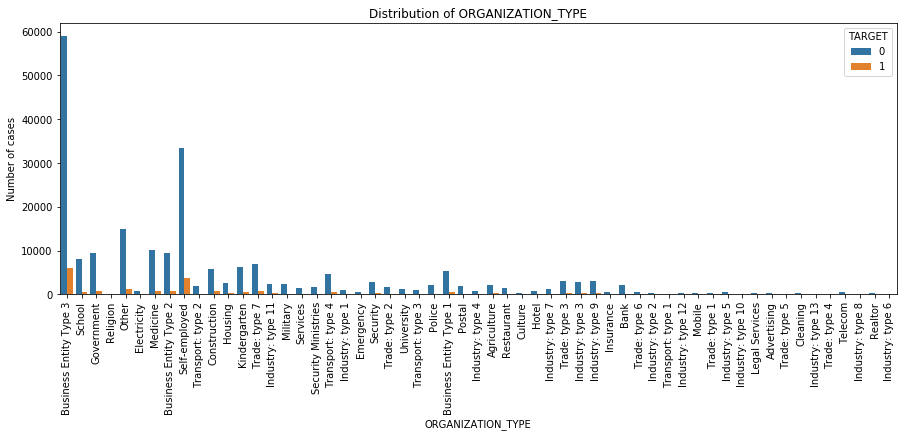

In [366]:
# Plotting distribution between column 'REGION_RATING_CLIENT_W_CITY','WEEKDAY_APPR_PROCESS_START',
#'HOUR_APPR_PROCESS_START', 'ORGANIZATION_TYPE' Vs. Number of Cases  Vs. Target

plt.figure(figsize=(15,5))
sns.countplot('ORGANIZATION_TYPE', data= df_app,hue='TARGET')
plt.title('Distribution of ORGANIZATION_TYPE')
plt.xticks(rotation=90)
plt.xlabel('ORGANIZATION_TYPE')
plt.ylabel('Number of cases')

plt.show()

#### Observations:
- Clients which have applied for loan credits are from most of the organization type 'Business Entity Type 3','self-Employed,'Other','Medicine' & 'Government'.
- Defaulter rate is high is Construction & self-employed followed by Business Entity Type 3 & Trade: Type 1

### 4.3 Numerical Univariables:

- FLAG_DOCUMENTS

In [367]:
df_app['FLAG_DOCUMENTS'] = df_app.loc[:,'FLAG_DOCUMENT_2':'FLAG_DOCUMENT_21'].apply(lambda x: x.sum(),axis=1)

In [368]:
df_app['FLAG_DOCUMENTS'].value_counts()

1    210862
0     25416
2      7178
3       155
4         1
Name: FLAG_DOCUMENTS, dtype: int64

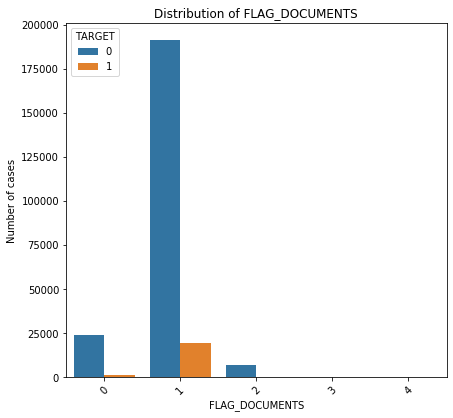

In [369]:
# Distribution of FLAG_DOCUMENTS Vs. Number of Cases

plt.figure(figsize=(15,30))
plt.subplot(4, 2, 7)
sns.countplot('FLAG_DOCUMENTS', data= df_app,hue='TARGET')
plt.title('Distribution of FLAG_DOCUMENTS')
plt.xticks(rotation=45)
plt.xlabel('FLAG_DOCUMENTS')
plt.ylabel('Number of cases')
plt.show()

In [370]:
df_app.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,INCOME_RANGE,Ratings_2,AGE,AGE_GROUP,FLAG_DOCUMENTS
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648,-2120,1,0,1,0,1,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.262949,2,2,2,2,-1134,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,High,Low,25,"(20.0, 25.0]",1
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186,-291,1,0,1,0,2,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,1,0,1,0,-828,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,High,High,45,"(40.0, 45.0]",1
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260,-2531,1,1,1,0,1,2,2,MONDAY,9,0,0,0,0,0,0,Government,0.555912,0,0,0,0,-815,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Low,Medium,52,"(50.0, 55.0]",0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039,-9833,-2437,1,0,0,0,2,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,0.650442,2,0,2,0,-617,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Medium,High,52,"(50.0, 55.0]",1
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,-19932,-3038,-4311,-3458,1,0,0,0,1,2,2,THURSDAY,11,0,0,0,0,1,1,Religion,0.322738,0,0,0,0,-1106,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,Medium,Low,54,"(50.0, 55.0]",1


###  4.4 Bivariate Analysis of Numerical variables for target & non-target population
- AMT_INCOME_TOTAL
- AMT_CREDIT
- AMT_ANNUITY
- AMT_GOODS_PRICE
- DAYS_BIRTH	
- DAYS_EMPLOYED
- DAYS_REGISTRATION
- DAYS_ID_PUBLISH
- REGION_POPULATION_RELATIVE

In [371]:
# Splitting Data W.r.t. Target 0 and Target 1

target_0 = df_app[df_app['TARGET']== 0]
target_1 = df_app[df_app['TARGET']== 1]

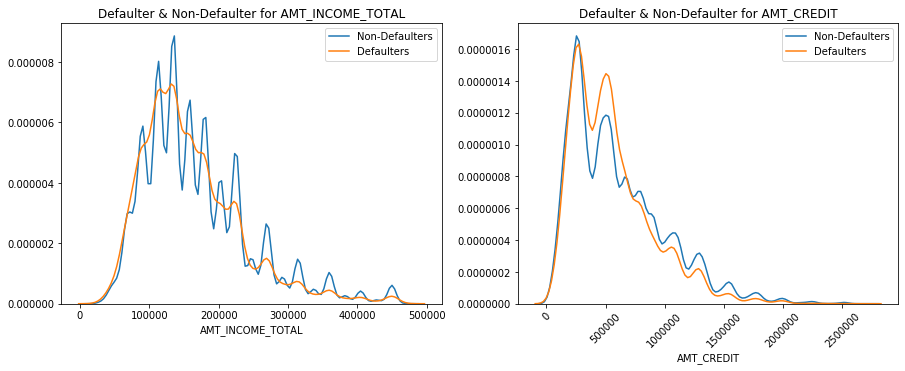

In [372]:
plt.figure(figsize=(15,30))
plt.subplot(5, 2, 1)
sns.distplot(target_0['AMT_INCOME_TOTAL'],label='Non-Defaulters',hist=False)
plt.title('Defaulter & Non-Defaulter for AMT_INCOME_TOTAL')
plt.xlabel('AMT_INCOME_TOTAL')

plt.subplot(5, 2, 1)
sns.distplot(target_1['AMT_INCOME_TOTAL'],label='Defaulters',hist=False)
plt.title('Defaulter & Non-Defaulter for AMT_INCOME_TOTAL')
plt.xlabel('AMT_INCOME_TOTAL')

plt.subplot(5, 2, 2)
sns.distplot(target_0['AMT_CREDIT'],label='Non-Defaulters',hist=False)
plt.title('Defaulter & Non-Defaulter for AMT_CREDIT')
plt.xticks(rotation=45)
plt.xlabel('AMT_CREDIT')

plt.subplot(5, 2, 2)
sns.distplot(target_1['AMT_CREDIT'],label='Defaulters',hist=False)
plt.title('Defaulter & Non-Defaulter for AMT_CREDIT')
plt.xticks(rotation=45)
plt.xlabel('AMT_CREDIT')

plt.show()

#### Observations:
- AMT_INCOME_TOTAL is between 50000 & 300000 mostly with normal distribution.
- AMT_INCOME_TOTAL have high defaulter and non-defaulter rate on income range of 90000 to 150000.
- AMT_CREDIT is right skewed
- AMT_CREDIT approx. between 10000 to 60000 have high defaulter and non-defaulter rate.

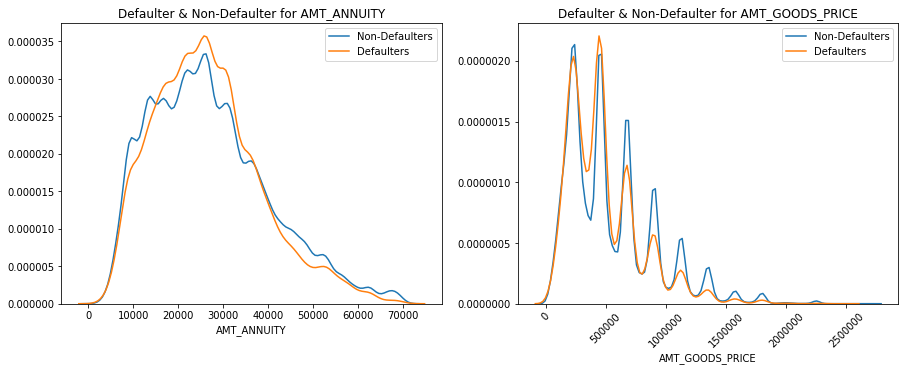

In [373]:
plt.figure(figsize=(15,30))
plt.subplot(5, 2, 3)
sns.distplot(target_0['AMT_ANNUITY'],label='Non-Defaulters',hist=False)
plt.title('Defaulter & Non-Defaulter for AMT_ANNUITY', )
plt.xlabel('AMT_ANNUITY')

plt.subplot(5, 2, 3)
sns.distplot(target_1['AMT_ANNUITY'],label='Defaulters',hist=False)
plt.title('Defaulter & Non-Defaulter for AMT_ANNUITY', )
plt.xlabel('AMT_ANNUITY')


plt.subplot(5, 2, 4)
sns.distplot(target_0['AMT_GOODS_PRICE'],label='Non-Defaulters',hist=False)
plt.title('Defaulter & Non-Defaulter for AMT_GOODS_PRICE')
plt.xticks(rotation=45)
plt.xlabel('AMT_GOODS_PRICE')

plt.subplot(5, 2, 4)
sns.distplot(target_1['AMT_GOODS_PRICE'],label='Defaulters',hist=False)
plt.title('Defaulter & Non-Defaulter for AMT_GOODS_PRICE')
plt.xticks(rotation=45)
plt.xlabel('AMT_GOODS_PRICE')

plt.show()

#### Observations:
- AMT_ANNUITY is slightly right skewed with total values between 0 and 70000
- AMT_ANNUITY have higher defaulter rate at 25000
- AMT_GOODS_PRICE is slightly right skewed with max value < 500000
- AMT_GOODS_PRICE have higher defaulter at 500000.

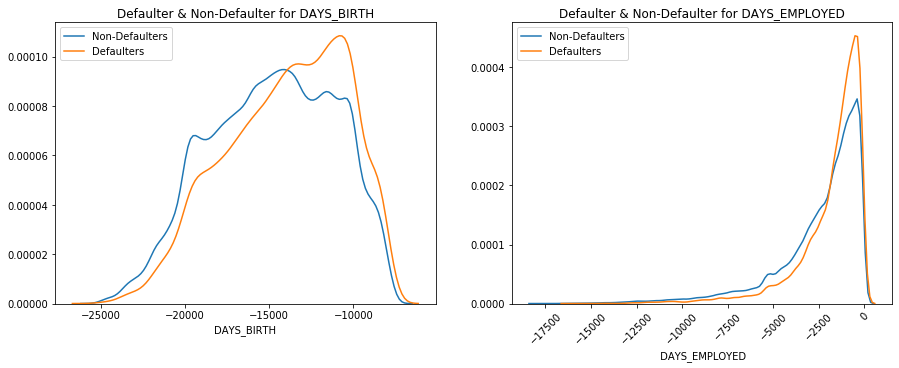

In [374]:
plt.figure(figsize=(15,30))
plt.subplot(5, 2, 5)
sns.distplot(target_0['DAYS_BIRTH'],label='Non-Defaulters',hist=False)
plt.title('Defaulter & Non-Defaulter for DAYS_BIRTH', )
plt.xlabel('DAYS_BIRTH')

plt.subplot(5, 2, 5)
sns.distplot(target_1['DAYS_BIRTH'],label='Defaulters',hist=False)
plt.title('Defaulter & Non-Defaulter for DAYS_BIRTH', )
plt.xlabel('DAYS_BIRTH')


plt.subplot(5, 2, 6)
sns.distplot(target_0['DAYS_EMPLOYED'],label='Non-Defaulters',hist=False)
plt.title('Defaulter & Non-Defaulter for DAYS_EMPLOYED')
plt.xticks(rotation=45)
plt.xlabel(' DAYS_EMPLOYED')

plt.subplot(5, 2, 6)
sns.distplot(target_1['DAYS_EMPLOYED'],label='Defaulters',hist=False)
plt.title('Defaulter & Non-Defaulter for DAYS_EMPLOYED')
plt.xticks(rotation=45)
plt.xlabel(' DAYS_EMPLOYED')

plt.show()

#### Observations:
- DAYS_BIRTH is max distributed between -20000 and -10000
- DAYS_EMPLOYED is left skewed where impact is mostly with days <-5000 
i.e., Applcations has mostly fresh employed people with < 5000 days.


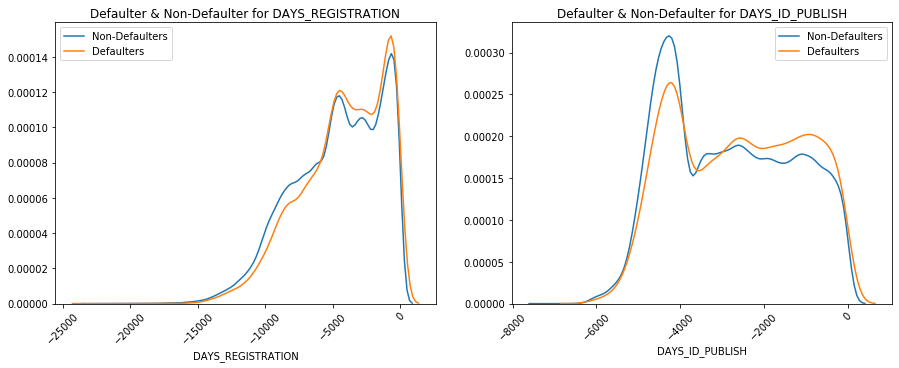

In [375]:
plt.figure(figsize=(15,30))
plt.subplot(5, 2, 7)
sns.distplot(target_0['DAYS_REGISTRATION'],label='Non-Defaulters',hist=False)
plt.title('Defaulter & Non-Defaulter for DAYS_REGISTRATION')
plt.xticks(rotation=45)
plt.xlabel('DAYS_REGISTRATION')

plt.subplot(5, 2, 7)
sns.distplot(target_1['DAYS_REGISTRATION'],label='Defaulters',hist=False)
plt.title('Defaulter & Non-Defaulter for DAYS_REGISTRATION')
plt.xticks(rotation=45)
plt.xlabel('DAYS_REGISTRATION')

plt.subplot(5, 2, 8)
sns.distplot(target_0['DAYS_ID_PUBLISH'],label='Non-Defaulters',hist=False)
plt.title('Defaulter & Non-Defaulter for DAYS_ID_PUBLISH')
plt.xticks(rotation=45)
plt.xlabel('DAYS_ID_PUBLISH')

plt.subplot(5, 2, 8)
sns.distplot(target_1['DAYS_ID_PUBLISH'],label='Defaulters',hist=False)
plt.title('Defaulter & Non-Defaulter for DAYS_ID_PUBLISH')
plt.xticks(rotation=45)
plt.xlabel('DAYS_ID_PUBLISH')
plt.show()

#### Observations:

- DAYS_REGISTRATION is left skewed where impact is mostly with days <-10000 i.e., Applcations has mostly recently registered people with <10000 days
- DAYS_ID_PUBLISH is distributed almostly equally between -3900 & 0.

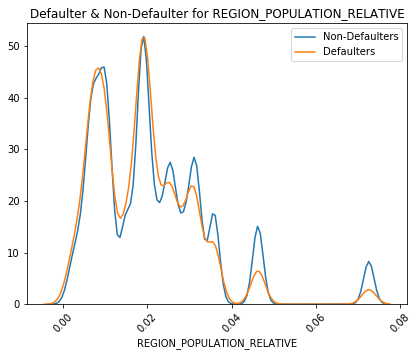

In [376]:
plt.figure(figsize=(15,30))
plt.subplot(5, 2, 7)
sns.distplot(target_0['REGION_POPULATION_RELATIVE'],label='Non-Defaulters',hist=False)
plt.title('Defaulter & Non-Defaulter for REGION_POPULATION_RELATIVE')
plt.xticks(rotation=45)
plt.xlabel('REGION_POPULATION_RELATIVE')

plt.subplot(5, 2, 7)
sns.distplot(target_1['REGION_POPULATION_RELATIVE'],label='Defaulters',hist=False)
plt.title('Defaulter & Non-Defaulter for REGION_POPULATION_RELATIVE')
plt.xticks(rotation=45)
plt.xlabel('REGION_POPULATION_RELATIVE')

plt.show()

#### Observations:
- Frequency of Defaulter population is less in high density areas.

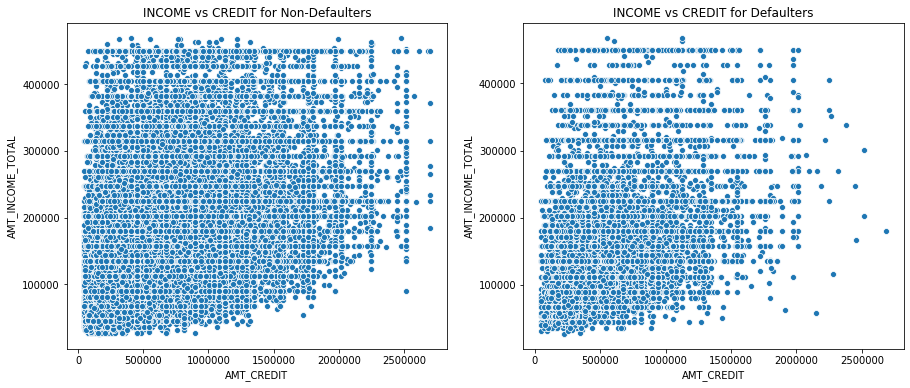

In [377]:
# Income vs Credit for Non-Defaulters & Defaulters

plt.figure(figsize=(15,6))
plt.subplot(121)
sns.scatterplot(x='AMT_CREDIT',y='AMT_INCOME_TOTAL',data=target_0)
plt.title('INCOME vs CREDIT for Non-Defaulters')

plt.subplot(122)
sns.scatterplot(x='AMT_CREDIT',y='AMT_INCOME_TOTAL',data=target_1)
plt.title('INCOME vs CREDIT for Defaulters')
plt.show()

#### Observation:
lower density of defaulters can be seen where income 300k or credit is lower than 200k.

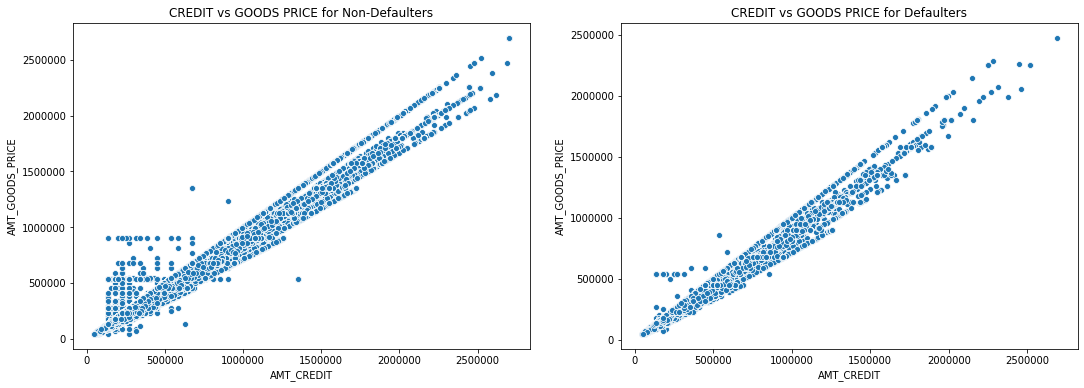

In [378]:
# Credit vs Goods Price for Non-Defaulters & Defaulters

plt.figure(figsize=(18,6))
plt.subplot(121)
sns.scatterplot(x='AMT_CREDIT',y='AMT_GOODS_PRICE',data=target_0)
plt.title('CREDIT vs GOODS PRICE for Non-Defaulters')

plt.subplot(122)
sns.scatterplot(x='AMT_CREDIT',y='AMT_GOODS_PRICE',data=target_1)
plt.title('CREDIT vs GOODS PRICE for Defaulters')
plt.show()

#### Observation:
- Defaulters are less if price of good is upto 500k and amount credit is also less than 500k

### 5. To find correlation for numerical columns for Target 0 & Target 1 case.

In [379]:
# For Target 0 columns

cols_0 = list(target_0[['SK_ID_CURR',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_REGISTRATION',
 'DAYS_ID_PUBLISH',
 'AGE',
 'FLAG_DOCUMENTS',
 'AMT_INCOME_TOTAL',
 'AMT_CREDIT',
 'AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'REGION_POPULATION_RELATIVE',
 'REGION_RATING_CLIENT',
 'REGION_RATING_CLIENT_W_CITY',
 'HOUR_APPR_PROCESS_START',
 'REG_REGION_NOT_LIVE_REGION',
 'REG_REGION_NOT_WORK_REGION',
 'LIVE_REGION_NOT_WORK_REGION',
 'REG_CITY_NOT_LIVE_CITY',
 'REG_CITY_NOT_WORK_CITY',
 'LIVE_CITY_NOT_WORK_CITY']])

cols_0

['SK_ID_CURR',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_REGISTRATION',
 'DAYS_ID_PUBLISH',
 'AGE',
 'FLAG_DOCUMENTS',
 'AMT_INCOME_TOTAL',
 'AMT_CREDIT',
 'AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'REGION_POPULATION_RELATIVE',
 'REGION_RATING_CLIENT',
 'REGION_RATING_CLIENT_W_CITY',
 'HOUR_APPR_PROCESS_START',
 'REG_REGION_NOT_LIVE_REGION',
 'REG_REGION_NOT_WORK_REGION',
 'LIVE_REGION_NOT_WORK_REGION',
 'REG_CITY_NOT_LIVE_CITY',
 'REG_CITY_NOT_WORK_CITY',
 'LIVE_CITY_NOT_WORK_CITY']

In [380]:
non_default_corr = target_0[cols_0].corr()
round(non_default_corr,3)

,SK_ID_CURR,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,AGE,FLAG_DOCUMENTS,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY
SK_ID_CURR,1.000,-0.001,0.000,0.000,0.001,0.001,-0.002,0.002,-0.000,0.001,0.000,0.001,-0.000,-0.001,-0.000,-0.000,0.001,0.003,-0.004,-0.002,0.000
DAYS_BIRTH,-0.001,1.000,0.352,0.301,0.110,-1.000,-0.054,-0.053,-0.153,-0.091,-0.147,-0.041,0.036,0.035,0.048,0.059,0.039,0.014,0.167,0.113,0.031
DAYS_EMPLOYED,0.000,0.352,1.000,0.173,0.087,-0.352,-0.033,-0.035,-0.088,-0.051,-0.089,0.009,-0.018,-0.017,0.022,0.057,0.083,0.064,0.112,0.127,0.075
DAYS_REGISTRATION,0.000,0.301,0.173,1.000,0.030,-0.300,0.003,0.038,-0.019,0.007,-0.016,-0.061,0.096,0.089,-0.031,0.021,0.016,0.007,0.048,0.056,0.032
DAYS_ID_PUBLISH,0.001,0.110,0.087,0.030,1.000,-0.109,-0.045,-0.032,-0.034,-0.024,-0.036,-0.003,0.003,0.001,0.006,0.027,0.021,0.010,0.054,0.033,0.002
AGE,0.001,-1.000,-0.352,-0.300,-0.109,1.000,0.054,0.053,0.153,0.091,0.147,0.041,-0.036,-0.036,-0.048,-0.059,-0.039,-0.014,-0.167,-0.113,-0.031
FLAG_DOCUMENTS,-0.002,-0.054,-0.033,0.003,-0.045,0.054,1.000,0.054,0.229,0.226,0.197,-0.007,0.002,0.003,-0.014,-0.019,-0.008,0.002,-0.021,-0.007,0.005
AMT_INCOME_TOTAL,0.002,-0.053,-0.035,0.038,-0.032,0.053,0.054,1.000,0.373,0.442,0.376,0.184,-0.215,-0.235,0.063,0.076,0.157,0.147,-0.002,-0.015,-0.006
AMT_CREDIT,-0.000,-0.153,-0.088,-0.019,-0.034,0.153,0.229,0.373,1.000,0.779,0.986,0.086,-0.090,-0.099,0.035,0.014,0.040,0.043,-0.037,-0.035,-0.011
AMT_ANNUITY,0.001,-0.091,-0.051,0.007,-0.024,0.091,0.226,0.442,0.779,1.000,0.777,0.102,-0.116,-0.129,0.028,0.032,0.067,0.065,-0.018,-0.024,-0.009


In [381]:
l0 = non_default_corr.unstack()
top_non_def_corr = l0.sort_values(ascending=False).drop_duplicates()

In [382]:
top_non_def_corr.head(11)

LIVE_CITY_NOT_WORK_CITY      LIVE_CITY_NOT_WORK_CITY        1.000000
AMT_CREDIT                   AMT_GOODS_PRICE                0.985526
REGION_RATING_CLIENT_W_CITY  REGION_RATING_CLIENT           0.949696
REG_REGION_NOT_WORK_REGION   LIVE_REGION_NOT_WORK_REGION    0.861292
LIVE_CITY_NOT_WORK_CITY      REG_CITY_NOT_WORK_CITY         0.820134
AMT_CREDIT                   AMT_ANNUITY                    0.778777
AMT_ANNUITY                  AMT_GOODS_PRICE                0.777195
REG_REGION_NOT_LIVE_REGION   REG_REGION_NOT_WORK_REGION     0.462789
REG_CITY_NOT_WORK_CITY       REG_CITY_NOT_LIVE_CITY         0.443552
AMT_INCOME_TOTAL             AMT_ANNUITY                    0.441844
                             AMT_GOODS_PRICE                0.376171
dtype: float64

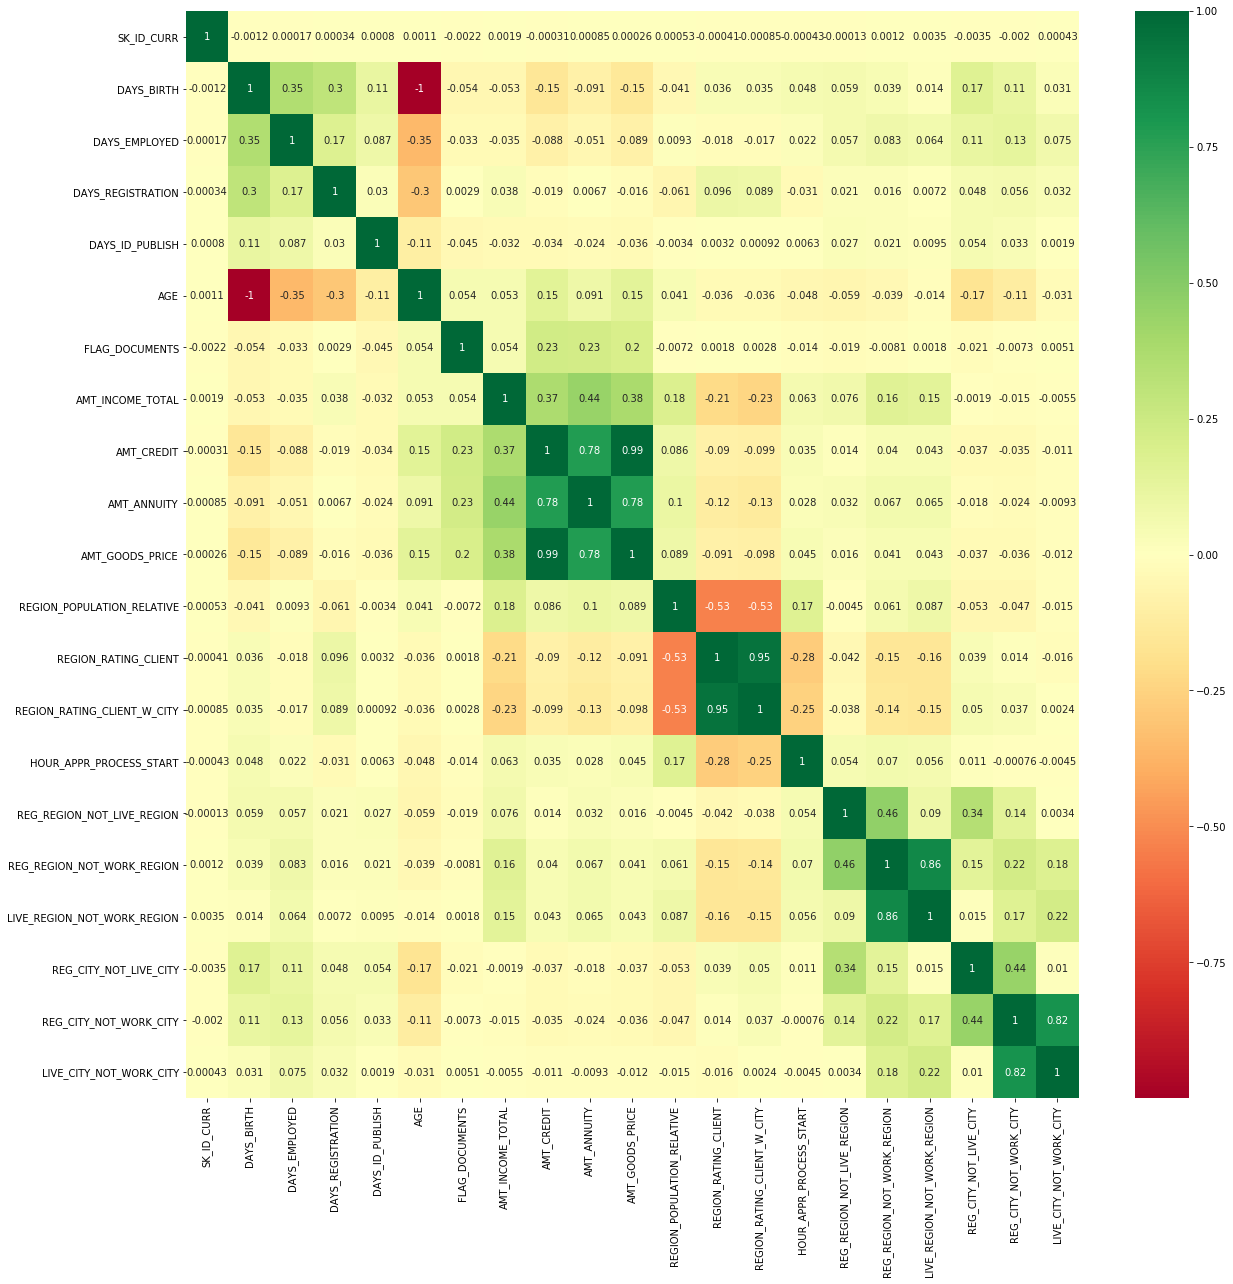

In [383]:
plt.figure(figsize=(20,20))
sns.heatmap(non_default_corr,annot=True, cmap = 'RdYlGn')
plt.show()

In [384]:
# For Target 1 columns

cols_1 = list(target_1[['SK_ID_CURR',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_REGISTRATION',
 'DAYS_ID_PUBLISH',
 'AGE',
 'FLAG_DOCUMENTS',
 'AMT_INCOME_TOTAL',
 'AMT_CREDIT',
 'AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'REGION_POPULATION_RELATIVE',
 'REGION_RATING_CLIENT',
 'REGION_RATING_CLIENT_W_CITY',
 'HOUR_APPR_PROCESS_START',
 'REG_REGION_NOT_LIVE_REGION',
 'REG_REGION_NOT_WORK_REGION',
 'LIVE_REGION_NOT_WORK_REGION',
 'REG_CITY_NOT_LIVE_CITY',
 'REG_CITY_NOT_WORK_CITY',
 'LIVE_CITY_NOT_WORK_CITY']])

cols_1

['SK_ID_CURR',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_REGISTRATION',
 'DAYS_ID_PUBLISH',
 'AGE',
 'FLAG_DOCUMENTS',
 'AMT_INCOME_TOTAL',
 'AMT_CREDIT',
 'AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'REGION_POPULATION_RELATIVE',
 'REGION_RATING_CLIENT',
 'REGION_RATING_CLIENT_W_CITY',
 'HOUR_APPR_PROCESS_START',
 'REG_REGION_NOT_LIVE_REGION',
 'REG_REGION_NOT_WORK_REGION',
 'LIVE_REGION_NOT_WORK_REGION',
 'REG_CITY_NOT_LIVE_CITY',
 'REG_CITY_NOT_WORK_CITY',
 'LIVE_CITY_NOT_WORK_CITY']

In [385]:
default_corr = target_1[cols_1].corr()
round(default_corr,3)

,SK_ID_CURR,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,AGE,FLAG_DOCUMENTS,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY
SK_ID_CURR,1.000,-0.006,0.001,0.002,-0.003,0.006,-0.008,-0.005,-0.001,-0.011,-0.001,0.005,-0.006,-0.004,0.002,-0.006,0.003,0.003,0.006,-0.002,-0.005
DAYS_BIRTH,-0.006,1.000,0.306,0.240,0.137,-1.000,-0.065,-0.098,-0.189,-0.092,-0.186,-0.049,0.048,0.047,0.035,0.048,0.023,-0.000,0.144,0.097,0.010
DAYS_EMPLOYED,0.001,0.306,1.000,0.137,0.095,-0.306,-0.041,-0.027,-0.107,-0.050,-0.113,-0.016,0.005,0.002,-0.000,0.059,0.074,0.052,0.114,0.135,0.070
DAYS_REGISTRATION,0.002,0.240,0.137,1.000,0.050,-0.240,-0.001,0.008,-0.034,0.016,-0.033,-0.056,0.113,0.108,-0.050,0.010,0.003,-0.001,0.029,0.049,0.027
DAYS_ID_PUBLISH,-0.003,0.137,0.095,0.050,1.000,-0.136,-0.070,-0.042,-0.060,-0.043,-0.063,-0.011,0.004,0.001,0.008,0.023,0.010,-0.001,0.046,0.015,-0.016
AGE,0.006,-1.000,-0.306,-0.240,-0.136,1.000,0.065,0.098,0.189,0.091,0.185,0.049,-0.048,-0.047,-0.035,-0.048,-0.023,-0.000,-0.144,-0.097,-0.010
FLAG_DOCUMENTS,-0.008,-0.065,-0.041,-0.001,-0.070,0.065,1.000,0.075,0.184,0.215,0.151,0.010,0.004,0.002,-0.006,-0.014,-0.011,-0.002,-0.024,-0.011,0.007
AMT_INCOME_TOTAL,-0.005,-0.098,-0.027,0.008,-0.042,0.098,0.075,1.000,0.342,0.409,0.343,0.115,-0.168,-0.185,0.070,0.081,0.159,0.146,-0.004,-0.012,0.001
AMT_CREDIT,-0.001,-0.189,-0.107,-0.034,-0.060,0.189,0.184,0.342,1.000,0.753,0.982,0.066,-0.057,-0.070,0.027,0.013,0.032,0.033,-0.035,-0.040,-0.017
AMT_ANNUITY,-0.011,-0.092,-0.050,0.016,-0.043,0.091,0.215,0.409,0.753,1.000,0.750,0.066,-0.067,-0.083,0.019,0.030,0.059,0.057,-0.015,-0.018,-0.004


In [386]:
l1 = default_corr.unstack()
top_def_corr = l1.sort_values(ascending=False).drop_duplicates()

In [387]:
top_def_corr.head(11)

LIVE_CITY_NOT_WORK_CITY      LIVE_CITY_NOT_WORK_CITY       1.000000
AMT_GOODS_PRICE              AMT_CREDIT                    0.981507
REGION_RATING_CLIENT_W_CITY  REGION_RATING_CLIENT          0.957735
LIVE_REGION_NOT_WORK_REGION  REG_REGION_NOT_WORK_REGION    0.846637
LIVE_CITY_NOT_WORK_CITY      REG_CITY_NOT_WORK_CITY        0.766674
AMT_CREDIT                   AMT_ANNUITY                   0.753175
AMT_GOODS_PRICE              AMT_ANNUITY                   0.749839
REG_REGION_NOT_WORK_REGION   REG_REGION_NOT_LIVE_REGION    0.507946
REG_CITY_NOT_LIVE_CITY       REG_CITY_NOT_WORK_CITY        0.479009
AMT_INCOME_TOTAL             AMT_ANNUITY                   0.409134
AMT_GOODS_PRICE              AMT_INCOME_TOTAL              0.343303
dtype: float64

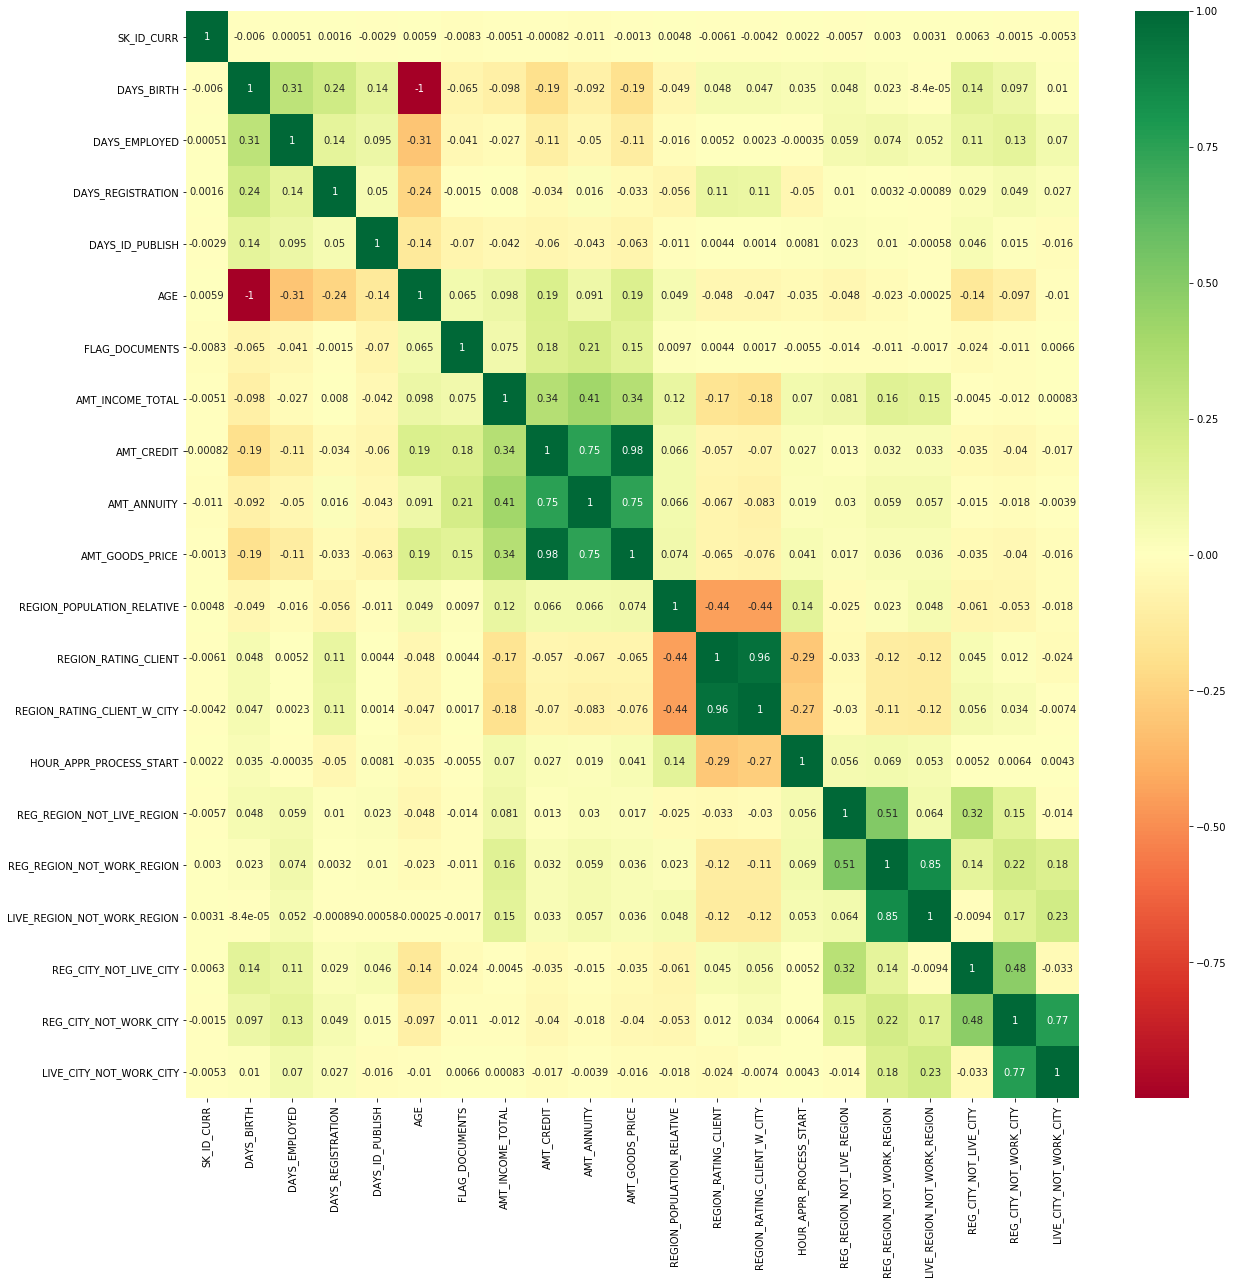

In [388]:
plt.figure(figsize=(20,20))
sns.heatmap(default_corr,annot=True, cmap = 'RdYlGn')
plt.show()

Now, we will check previous application dataset